### Capstone Project

##### Author: Guntaas Kaur
##### Contact: guntaaskaur1@gmail.com
##### Date: 11-03-2024

## Introduction
<b>Predicting Small Businesses Success & Failure </b><br>
Understanding the Reasons Behind Small Business Failures and Leveraging Machine Learning for Enhanced Success

Data Dictionary
| Data         | Field        | Description                                      |
|--------------|--------------|--------------------------------------------------|
| Businesses   | Business ID  | Unique identifier for each business.             |
|              | Name         | Name of the business.                            |
|              | Address      | Address of the business.                         |
|              | City         | The city where the business is located.          |
|              | State        | State where the business is located.             |
|              | Postal Code  | Postal code of the business.                     |
|              | Latitude     | Latitude coordinates of the business location.   |
|              | Longitude    | Longitude coordinate of the business location.   |
|              | Stars        | Average rating of the business.                  |
|              | Review Count | Number of reviews the business has received.     |
|              | Is Open      | Indicates if the business is currently open (1 for open, 0 for closed). |
|              | Attributes   | Additional attributes or features of the business. |
|              | Categories   | Categories or types of services offered by the business. |
|              | Hours        | Operating hours of the business.                 |
| Reviews      | Review ID    | Unique identifier for each review.               |
|              | User ID      | Unique identifier for the user who wrote the review. |
|              | Business ID  | Unique identifier for the business being reviewed. |
|              | Stars        | Rating given by the user (1 to 5 stars).         |
|              | Text         | The text content of the review.                  |
|              | Date         | The date when the review was written.            |
| Users        | User ID      | Unique identifier for each user.                 |
|              | Name         | User's name.                                     |
|              | Review Count | Number of reviews written by the user.           |
|              | Average Stars| Average rating given by the user.                |
|              | Yelper Since | Date when the user joined Yelp.                  |
| Tips         | User ID      | Unique identifier for the user who wrote the tip. |
|              | Business ID  | Unique identifier for the business the tip is about. |
|              | Text         | The text content of the tip.                     |
|              | Date         | The date when the tip was written.               |
| Checkin      | Business_id  | Unique identifier for each business.             |
|              | Date         | Timestamps indicating the dates and times associated with checkins on business.|



<b>Target: Is_open<b>

---
### <a id="BasicAnalysis"> Part 1 Basic Analysis</a>
---

In [1]:
#importing required libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The code reads Yelp business data from a JSON file into a pandas DataFrame. It expects each line in the file to represent a separate JSON object. Additionally, it sets the chunk size to 150243 rows, allowing for efficient processing of large datasets.

In [2]:
businesses = pd.read_json("data/yelp_academic_dataset_business.json", lines=True, orient='columns', chunksize=150243)

# read the data 
for business in businesses:
    df_business = business
    break

In [3]:
print("Business :",df_business.shape)


Business : (150243, 14)


In [4]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150243 entries, 0 to 150242
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150243 non-null  object 
 1   name          150243 non-null  object 
 2   address       150243 non-null  object 
 3   city          150243 non-null  object 
 4   state         150243 non-null  object 
 5   postal_code   150243 non-null  object 
 6   latitude      150243 non-null  float64
 7   longitude     150243 non-null  float64
 8   stars         150243 non-null  float64
 9   review_count  150243 non-null  int64  
 10  is_open       150243 non-null  int64  
 11  attributes    136507 non-null  object 
 12  categories    150140 non-null  object 
 13  hours         127038 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.0+ MB


<b>Flattening Nested Structures:</b>
The dataset contains nested dictionaries and JSON-like structures, had to flatten them into string representations to create flat feature vectors suitable for modeling.
First, we will convert hours to string then extract day and time, later we will convert time to timestamp.

In [5]:
one_row = df_business.iloc[1]

print(one_row)

business_id                                mpf3x-BjTdTEA3yCZrAYPw
name                                                The UPS Store
address                           87 Grasso Plaza Shopping Center
city                                                       Affton
state                                                          MO
postal_code                                                 63123
latitude                                                38.551126
longitude                                              -90.335695
stars                                                         3.0
review_count                                                   15
is_open                                                         1
attributes                 {'BusinessAcceptsCreditCards': 'True'}
categories      Shipping Centers, Local Services, Notaries, Ma...
hours           {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...
Name: 1, dtype: object


<b>Size and Structure: 
    The DataFrame contains 150,346 rows and 16 columns.

Data Types: 
    The columns contain a mix of data types:

3 columns are of type float64.
2 columns are of type int64.
9 columns are of type object (likely strings).
Missing Values: Some columns have missing values:

The 'attributes','categories' and 'hours' column has missing values. They contain dictionaries.

In [6]:
df_business.head().T

,0,1,2,3,4
business_id,Pns2l4eNsfO8kk83dixA6A,mpf3x-BjTdTEA3yCZrAYPw,tUFrWirKiKi_TAnsVWINQQ,MTSW4McQd7CbVtyjqoe9mw,mWMc6_wTdE0EUBKIGXDVfA
name,"Abby Rappoport, LAC, CMQ",The UPS Store,Target,St Honore Pastries,Perkiomen Valley Brewery
address,"1616 Chapala St, Ste 2",87 Grasso Plaza Shopping Center,5255 E Broadway Blvd,935 Race St,101 Walnut St
city,Santa Barbara,Affton,Tucson,Philadelphia,Green Lane
state,CA,MO,AZ,PA,PA
postal_code,93101,63123,85711,19107,18054
latitude,34.426679,38.551126,32.223236,39.955505,40.338183
longitude,-119.711197,-90.335695,-110.880452,-75.155564,-75.471659
stars,5.0,3.0,3.5,4.0,4.5
review_count,7,15,22,80,13


Finding out the number of small businesses listed by assuming any business is small if they have less than 2 chains of businesses

In [7]:
# Filter the DataFrame based on the count of occurrences of each unique value in the 'name' column
df_small_business = df_business[df_business['name'].map(df_business['name'].value_counts()) < 2]
df_small_business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
7,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 Pasadena Ave S,St. Petersburg,FL,33707,27.766590,-82.732983,3.5,5,1,None,"Synagogues, Religious Organizations","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150238,Oy8MfKjNpv3uKs6tCgCVVw,Petrucci's Dairy Barn,2863 Knights Rd,Bensalem,PA,19020,40.103088,-74.951998,4.0,25,1,"{'BusinessAcceptsCreditCards': 'False', 'Busin...","Ice Cream & Frozen Yogurt, Food","{'Monday': '12:0-21:0', 'Tuesday': '12:0-21:0'..."
150239,TSwMwVq5GtQh5LW2t32uGA,Woody's Roundup Bar & Grill,"Earl Warren Showgrounds, 3400 Calle Real",Santa Barbara,CA,93105,34.430895,-119.735645,2.0,6,0,"{'Caters': 'True', 'BusinessParking': '{'garag...","Barbeque, Bars, Restaurants, Nightlife",None
150240,gem2iNVMy6qhNDO_pO4IqA,Sweet L's Bakery,26 Hibiscus St,Tarpon Springs,FL,34689,28.147221,-82.756020,5.0,10,0,"{'BikeParking': 'False', 'BusinessParking': '{...","Desserts, Food, Bakeries","{'Monday': '0:0-0:0', 'Wednesday': '11:0-16:0'..."
150241,XjvaFqjMoU80yO2LpsYqEA,Washoe Lake State Park,County Road 101,New Washoe City,NV,89704,39.321013,-119.796692,4.0,6,1,"{'BusinessParking': '{'garage': False, 'street...","Active Life, Parks",None


In [8]:
# Reset the index of the DataFrame
df_business.reset_index(drop=True, inplace=True)

In [9]:
df_business['state'].value_counts()

state
PA     34017
FL     26318
TN     12047
IN     11239
MO     10905
LA      9920
AZ      9901
NJ      8530
NV      7712
AB      5566
CA      5198
ID      4462
DE      2263
IL      2144
TX         4
CO         3
WA         2
HI         2
MA         2
NC         1
UT         1
MT         1
MI         1
SD         1
XMS        1
VI         1
VT         1
Name: count, dtype: int64

PA: Pennsylvania
FL: Florida
TN: Tennessee
IN: Indiana
MO: Missouri
LA: Louisiana
AZ: Arizona
NJ: New Jersey
NV: Nevada
AB: Alberta (This is a Canadian province, not a U.S. state)
CA: California
ID: Idaho
DE: Delaware
IL: Illinois
TX: Texas
CO: Colorado
WA: Washington
HI: Hawaii
MA: Massachusetts
NC: North Carolina
UT: Utah
MT: Montana
MI: Michigan
SD: South Dakota
XMS: This abbreviation is not recognized as a U.S. state or Canadian province abbreviation.
VI: Virgin Islands (This is a territory of the United States, not a state)
VT: Vermont

In [10]:
df_business_subset=df_business.drop(columns=['attributes','categories','hours'])

In [11]:
df_business_subset.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1


### Removing Duplicates

In [12]:
df_business_subset.duplicated().sum()

0

Empty dataset specifies that there are no duplicate values in specified columns

In [13]:
df_business_subset.isna().sum()

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
dtype: int64

### Removing Null Values

In [14]:
# Count occurrences of categories starting with 'rest'
# Convert strings in the 'categories' column to lowercase
df_business['categories'] = df_business['categories'].str.lower()

rest_categories_count = df_business['categories'].str.contains('rest.*', regex=True)

# Print the result
print(rest_categories_count)

0         False
1         False
2         False
3          True
4         False
          ...  
150238    False
150239     True
150240    False
150241    False
150242    False
Name: categories, Length: 150243, dtype: object


In [15]:
# Print unique categories
print(df_business['categories'].unique())


['doctors, traditional chinese medicine, naturopathic/holistic, acupuncture, health & medical, nutritionists'
 'shipping centers, local services, notaries, mailbox centers, printing services'
 'department stores, shopping, fashion, home & garden, electronics, furniture stores'
 ... 'restaurants, pizza, mexican'
 'specialty food, event planning & services, restaurants, sandwiches, street vendors, caterers, cheese shops, food trucks, food'
 'shopping, home & garden, home decor, home services, paint stores, painters, contractors']


In [16]:
df_business['categories'].isna().sum()

103

In [17]:
df_business['categories'].isna().mean()*100

0.06855560658400059

The percentage of null for categories is much smaller. For the <3% missing columns so we can remove those rows.

In [18]:
df_business.dropna(subset=['categories'], inplace=True)


In [19]:
df_business['categories'].isna().sum()

0

For the attributes, hours columns it may be worth imputing these values as dropping 15.37% and 9.02% of rows may be too much data loss.

In [20]:
#making everything lower case + removing punctuation
df_business['address'] = df_business['address'].str.lower()

df_business['address'] = df_business['address'].str.replace('[^\w\s]','')

In [21]:
df_business['address'].head(10)

0                        1616 chapala st, ste 2
1               87 grasso plaza shopping center
2                          5255 e broadway blvd
3                                   935 race st
4                                 101 walnut st
5                                 615 s main st
6    8522 eager road, dierbergs brentwood point
7                            400 pasadena ave s
8                             8025 mackenzie rd
9                           2312 dickerson pike
Name: address, dtype: object

In [22]:
df_business=df_business.dropna(subset=['categories',],axis=0)

In [23]:
df_business.isna().mean()

business_id     0.000000
name            0.000000
address         0.000000
city            0.000000
state           0.000000
postal_code     0.000000
latitude        0.000000
longitude       0.000000
stars           0.000000
review_count    0.000000
is_open         0.000000
attributes      0.090809
categories      0.000000
hours           0.153870
dtype: float64

In [24]:
df_business['is_open'].value_counts()

is_open
1    119524
0     30616
Name: count, dtype: int64

#### Hours- each row contains a dictionary where the keys represent days of the week and the values are strings representing the opening hours for each day. 

In [25]:
df_business['hours'].head()

0                                                 None
1    {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...
2    {'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...
3    {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...
4    {'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...
Name: hours, dtype: object

In [26]:
#split out the dict
hours_day_df = df_business['hours'].apply(pd.Series)
# Display the DataFrame after conversion
print(hours_day_df.head())

     Monday    Tuesday  Wednesday   Thursday     Friday   Saturday     Sunday
0       NaN        NaN        NaN        NaN        NaN        NaN        NaN
1   0:0-0:0  8:0-18:30  8:0-18:30  8:0-18:30  8:0-18:30   8:0-14:0        NaN
2  8:0-22:0   8:0-22:0   8:0-22:0   8:0-22:0   8:0-23:0   8:0-23:0   8:0-22:0
3  7:0-20:0   7:0-20:0   7:0-20:0   7:0-20:0   7:0-21:0   7:0-21:0   7:0-21:0
4       NaN        NaN  14:0-22:0  16:0-22:0  12:0-22:0  12:0-22:0  12:0-18:0


In [27]:
hours_day_df.dtypes

Monday       object
Tuesday      object
Wednesday    object
Thursday     object
Friday       object
Saturday     object
Sunday       object
dtype: object

In [28]:
# Replace specific text values with NaT
hours_day_df['Monday'] = hours_day_df['Monday'].replace({'nan': 'NaT'})

# Print the unique values in the 'Monday' column
print(hours_day_df['Monday'].unique())

[nan '0:0-0:0' '8:0-22:0' ... '8:0-1:45' '7:30-19:45' '20:0-4:0']


In [29]:
# Replace NaN values with an empty string
hours_day_df.fillna('', inplace=True)
hours_day_df.value_counts()

Monday     Tuesday    Wednesday  Thursday   Friday     Saturday   Sunday   
                                                                               23102
0:0-0:0    0:0-0:0    0:0-0:0    0:0-0:0    0:0-0:0    0:0-0:0    0:0-0:0       6787
8:0-17:0   8:0-17:0   8:0-17:0   8:0-17:0   8:0-17:0                            2015
9:0-17:0   9:0-17:0   9:0-17:0   9:0-17:0   9:0-17:0                            1598
11:0-21:0  11:0-21:0  11:0-21:0  11:0-21:0  11:0-21:0  11:0-21:0  11:0-21:0      621
                                                                               ...  
0:0-0:0    8:0-18:0   11:0-19:0  8:0-18:0                                          1
                      12:0-20:0  8:0-18:0   12:0-20:0  12:0-20:0  12:0-20:0        1
                      2:0-18:0   8:0-18:0                                          1
                      7:0-12:0   8:0-18:0   7:0-17:0   12:0-19:0                   1
9:45-19:0  9:45-19:0  9:45-19:0  9:45-19:0  9:45-19:0  9:45-19:0  10:0-17:

In [30]:
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 chapala st, ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"doctors, traditional chinese medicine, naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 grasso plaza shopping center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"shipping centers, local services, notaries, ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 e broadway blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","department stores, shopping, fashion, home & g...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 race st,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","restaurants, food, bubble tea, coffee & tea, b...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 walnut st,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","brewpubs, breweries, food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [31]:
# Replace NaN values with an empty string
hours_day_df.fillna('', inplace=True)

# Create new columns for open and close times for each day
for day in ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
    hours_day_df[day] = hours_day_df[day].replace({'none': pd.NaT})
    hours_day_df[[f'{day}_open', f'{day}_close']] = hours_day_df[day].str.split('-', expand=True)
    # Converting 'start_time' and 'end_time' columns to datetime
    hours_day_df[f'{day}_open'] = pd.to_datetime(hours_day_df[f'{day}_open'], format='%H:%M')
    hours_day_df[f'{day}_close'] = pd.to_datetime(hours_day_df[f'{day}_close'], format='%H:%M')                
                 
                 
hours_day_df.drop(columns=['Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],inplace=True)
# Display the DataFrame with new open and close columns
print(hours_day_df)


               Monday_open        Monday_close        Tuesday_open  \
0                      NaT                 NaT                 NaT   
1      1900-01-01 00:00:00 1900-01-01 00:00:00 1900-01-01 08:00:00   
2      1900-01-01 08:00:00 1900-01-01 22:00:00 1900-01-01 08:00:00   
3      1900-01-01 07:00:00 1900-01-01 20:00:00 1900-01-01 07:00:00   
4                      NaT                 NaT                 NaT   
...                    ...                 ...                 ...   
150238 1900-01-01 12:00:00 1900-01-01 21:00:00 1900-01-01 12:00:00   
150239                 NaT                 NaT                 NaT   
150240 1900-01-01 00:00:00 1900-01-01 00:00:00                 NaT   
150241                 NaT                 NaT                 NaT   
150242                 NaT                 NaT                 NaT   

             Tuesday_close      Wednesday_open     Wednesday_close  \
0                      NaT                 NaT                 NaT   
1      1900-01-01 1

In [32]:
hours_day_df.dtypes

Monday_open        datetime64[ns]
Monday_close       datetime64[ns]
Tuesday_open       datetime64[ns]
Tuesday_close      datetime64[ns]
Wednesday_open     datetime64[ns]
Wednesday_close    datetime64[ns]
Thursday_open      datetime64[ns]
Thursday_close     datetime64[ns]
Friday_open        datetime64[ns]
Friday_close       datetime64[ns]
Saturday_open      datetime64[ns]
Saturday_close     datetime64[ns]
Sunday_open        datetime64[ns]
Sunday_close       datetime64[ns]
dtype: object

In [33]:
mean_values = hours_day_df.mean()

for column in hours_day_df.columns:
    hours_day_df[column].fillna(mean_values[column], inplace=True)

In [34]:
hours_day_df.isna().mean()

Monday_open        0.0
Monday_close       0.0
Tuesday_open       0.0
Tuesday_close      0.0
Wednesday_open     0.0
Wednesday_close    0.0
Thursday_open      0.0
Thursday_close     0.0
Friday_open        0.0
Friday_close       0.0
Saturday_open      0.0
Saturday_close     0.0
Sunday_open        0.0
Sunday_close       0.0
dtype: float64

In [35]:
# Calculate the mean of each column
mean_values = hours_day_df.mean()

# Replace NaN values with the mean of each column
hours_day_df.fillna(mean_values, inplace=True)

In [36]:
#key for reference
hours_day_df['business_id'] = df_business['business_id']

In [37]:
df_business.drop(columns='hours',inplace=True)

In [38]:
df_business.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
dtype: object

In [39]:
# Merging on business_id column
df_business = df_business.merge(hours_day_df, on='business_id', how='left')

# Display the combined DataFrame
print(df_business.head())

              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 chapala st, ste 2  Santa Barbara    CA       93101   
1  87 grasso plaza shopping center         Affton    MO       63123   
2             5255 e broadway blvd         Tucson    AZ       85711   
3                      935 race st   Philadelphia    PA       19107   
4                    101 walnut st     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  ...  \
0  34.426679 -119.711197    5.0             7  ...   
1  38.551126  -90.335695    3.0            15  ...   
2  32.223236 -110.880452    3.5            22  ...   
3  39.955505  -75.155564  

In [40]:
#df_business = pd.concat([df_business, hours_day_df], axis=1)

# Display the combined DataFrame
#print(df_business.head())

In [41]:
df_business.isna().sum()

business_id            0
name                   0
address                0
city                   0
state                  0
postal_code            0
latitude               0
longitude              0
stars                  0
review_count           0
is_open                0
attributes         13634
categories             0
Monday_open            0
Monday_close           0
Tuesday_open           0
Tuesday_close          0
Wednesday_open         0
Wednesday_close        0
Thursday_open          0
Thursday_close         0
Friday_open            0
Friday_close           0
Saturday_open          0
Saturday_close         0
Sunday_open            0
Sunday_close           0
dtype: int64

In [42]:
#Removing rows containing attributes as they cannot be replaced with any specific values
df_business = df_business.dropna(subset=['attributes'])

### Attributes - Contains 39 attributes, out of which some of them are dictionaries like Business Parking

In [43]:
# Replace NaN values in the 'attributes' column with an empty dictionary as there is no possibility of filling with any other values.
df_business['attributes'].fillna('{}', inplace=True)

In [44]:
#break up dict inside df
df_atr = df_business['attributes'].apply(pd.Series)
df_atr.head(10)

,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,CoatCheck,RestaurantsTakeOut,RestaurantsDelivery,Caters,WiFi,BusinessParking,...,AcceptsInsurance,BestNights,BYOB,Corkage,BYOBCorkage,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions
0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,True,True,2,False,False,False,False,u'no',"{'garage': False, 'street': False, 'validated'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,False,True,1,NaN,True,False,True,u'free',"{'garage': False, 'street': True, 'validated':...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,True,True,NaN,NaN,True,NaN,False,NaN,"{'garage': None, 'street': None, 'validated': ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,False,True,False,1,False,True,True,False,u'no',None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,True,True,2,NaN,NaN,NaN,NaN,NaN,"{'garage': False, 'street': False, 'validated'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,True,NaN,1,NaN,True,False,True,u'free',"{'garage': False, 'street': False, 'validated'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,False,True,NaN,1,False,True,True,False,u'no',"{'garage': False, 'street': False, 'validated'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,True,True,2,NaN,NaN,NaN,NaN,NaN,"{'garage': False, 'street': False, 'validated'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df_business['attributes'].head(10)


0                         {'ByAppointmentOnly': 'True'}
1                {'BusinessAcceptsCreditCards': 'True'}
2     {'BikeParking': 'True', 'BusinessAcceptsCredit...
3     {'RestaurantsDelivery': 'False', 'OutdoorSeati...
4     {'BusinessAcceptsCreditCards': 'True', 'Wheelc...
5     {'BusinessParking': 'None', 'BusinessAcceptsCr...
6     {'BusinessAcceptsCreditCards': 'True', 'Restau...
8     {'Caters': 'True', 'Alcohol': 'u'full_bar'', '...
9     {'RestaurantsAttire': ''casual'', 'Restaurants...
10    {'RestaurantsPriceRange2': '2', 'BikeParking':...
Name: attributes, dtype: object

In [46]:
#inspect types
df_atr.dtypes

ByAppointmentOnly             object
BusinessAcceptsCreditCards    object
BikeParking                   object
RestaurantsPriceRange2        object
CoatCheck                     object
RestaurantsTakeOut            object
RestaurantsDelivery           object
Caters                        object
WiFi                          object
BusinessParking               object
WheelchairAccessible          object
HappyHour                     object
OutdoorSeating                object
HasTV                         object
RestaurantsReservations       object
DogsAllowed                   object
Alcohol                       object
GoodForKids                   object
RestaurantsAttire             object
Ambience                      object
RestaurantsTableService       object
RestaurantsGoodForGroups      object
DriveThru                     object
NoiseLevel                    object
GoodForMeal                   object
BusinessAcceptsBitcoin        object
Smoking                       object
M

In [47]:
#select cols that are still as objects
df_atr_obj_cols = df_atr.select_dtypes(include='object').columns
print(df_atr_obj_cols)

Index(['ByAppointmentOnly', 'BusinessAcceptsCreditCards', 'BikeParking',
       'RestaurantsPriceRange2', 'CoatCheck', 'RestaurantsTakeOut',
       'RestaurantsDelivery', 'Caters', 'WiFi', 'BusinessParking',
       'WheelchairAccessible', 'HappyHour', 'OutdoorSeating', 'HasTV',
       'RestaurantsReservations', 'DogsAllowed', 'Alcohol', 'GoodForKids',
       'RestaurantsAttire', 'Ambience', 'RestaurantsTableService',
       'RestaurantsGoodForGroups', 'DriveThru', 'NoiseLevel', 'GoodForMeal',
       'BusinessAcceptsBitcoin', 'Smoking', 'Music', 'GoodForDancing',
       'AcceptsInsurance', 'BestNights', 'BYOB', 'Corkage', 'BYOBCorkage',
       'HairSpecializesIn', 'Open24Hours', 'RestaurantsCounterService',
       'AgesAllowed', 'DietaryRestrictions'],
      dtype='object')


In [48]:
def str_dict_to_df(series):
    """
    Takes in a pandas series with dicts stored as strings
    returns dataframe with dict keys as columns
    
    serires: pandas series
    """
    eval_list = []
    for sr in series:
        if not pd.isna(sr):
            eval_list.append(eval(sr))
        else:
            eval_list.append(np.nan)
    
    eval_df = pd.Series(eval_list).apply(pd.Series)  
    
    #drop cols that are all nan
    eval_df = eval_df.dropna(axis=1, how='all')
    
    
    return eval_df

In [49]:
#store col names
dict_cols_list = []

for col in df_atr_obj_cols:
    #if contains a curly bracket, then assume column is a dict as string
    if df_atr[col].str.contains('{').any():
        dict_cols_list.append(col)
print(dict_cols_list)  

['BusinessParking', 'Ambience', 'GoodForMeal', 'Music', 'BestNights', 'HairSpecializesIn', 'DietaryRestrictions']


In [50]:
#store dataframes from dict nested columns
dict_col_df_list = []

for col in dict_cols_list:
    #apply string to dict evaluation
    temp_df = str_dict_to_df(df_atr[col])
    #append to list
    dict_col_df_list.append(temp_df)

#combine all in one column
dict_col_df = pd.concat(dict_col_df_list, axis=1)
dict_col_df.head()

,garage,street,validated,lot,valet,romantic,intimate,touristy,hipster,divey,...,kids,perms,asian,dairy-free,gluten-free,vegan,kosher,halal,soy-free,vegetarian
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,False,False,True,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,True,False,False,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,None,None,True,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
#store dummy attribute columns in list
atr_dum_df_cols = []

#iterate over object columns
for col in df_atr_obj_cols:
    #if contains a categorical variable then it begins with a u
    if df_atr[col].str.contains("u'").any():
        #add to the list
        atr_dum_df_cols.append(col)

#print out list
print(atr_dum_df_cols)

['WiFi', 'BusinessParking', 'Alcohol', 'RestaurantsAttire', 'Ambience', 'NoiseLevel', 'GoodForMeal', 'Smoking', 'Music', 'BestNights', 'BYOBCorkage', 'HairSpecializesIn', 'AgesAllowed']


In [52]:
#explore unique entries in attribute columns
for col in atr_dum_df_cols:
    print(col)
    print(df_atr[col].unique())
    print(50*'-')

WiFi
[nan "u'no'" "u'free'" "'free'" "'no'" 'None' "u'paid'" "'paid'"]
--------------------------------------------------
BusinessParking
[nan
 "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"
 "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}"
 "{'garage': None, 'street': None, 'validated': None, 'lot': True, 'valet': False}"
 'None'
 "{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}"
 "{'garage': None, 'street': False, 'validated': None, 'lot': True, 'valet': False}"
 "{u'valet': False, u'garage': None, u'street': True, u'lot': False, u'validated': None}"
 "{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}"
 "{'garage': True, 'street': False, 'validated': False, 'lot': False, 'valet': False}"
 "{'garage': True, 'street': False, 'validated': True, 'lot': False, 'valet': True}"
 "{'garage': None, 'street': True, 'validated': None, 'lot': False, 'v

#### Creation of a mapping dictionary to assign numerical values to categories.
Use of the map() function to replace categorical values with numerical values based on the mapping dictionary.

In [53]:
#rank by type
business_parking = dict(zip(
    [np.nan ,"u'garage" ,"'garage'" ,
     "'street'" ,"u'street'" ,"u'validated'" ,
     'None',"'validated'","u'lot'" ,"'lot'","u'valet'" ,"'valet'"], 
    [0, 1, 1, 
     2, 2, 3, 
     0, 3,4,4,5,5]))
print(business_parking)

{nan: 0, "u'garage": 1, "'garage'": 1, "'street'": 2, "u'street'": 2, "u'validated'": 3, 'None': 0, "'validated'": 3, "u'lot'": 4, "'lot'": 4, "u'valet'": 5, "'valet'": 5}


In [54]:
#noise level
noise_level_dict = dict(zip([np.nan, "u'loud'" ,"u'average'" ,
                             "'average'" ,"u'quiet'" ,"'loud'" ,
                             "'very_loud'", "'quiet'" ,"u'very_loud'" ,'None'], 
                            [0, 3, 2, 
                             2, 1, 3, 
                             4, 1 , 4, 0]))
print(noise_level_dict)

{nan: 0, "u'loud'": 3, "u'average'": 2, "'average'": 2, "u'quiet'": 1, "'loud'": 3, "'very_loud'": 4, "'quiet'": 1, "u'very_loud'": 4, 'None': 0}


In [55]:
#free wifi is the best kind of wifi
wifi_dict = dict(zip(
    [np.nan ,"u'no'" ,"'free'" ,
     "u'free'" ,"'no'" ,"u'paid'" ,"'paid'" ,'None'], 
    [0, 1, 3, 
     3, 1, 2, 2, 0]))
print(wifi_dict)

{nan: 0, "u'no'": 1, "'free'": 3, "u'free'": 3, "'no'": 1, "u'paid'": 2, "'paid'": 2, 'None': 0}


In [56]:

alcohol_dict = dict(zip([np.nan ,"u'full_bar'" ,"u'beer_and_wine'" ,
                         "u'none'" ,"'beer_and_wine'" ,"'none'", 
                         "'full_bar'" ,'None'],
                        [0, 2, 1, 
                         0, 1, 0, 
                         2, 0]))
print(alcohol_dict)

{nan: 0, "u'full_bar'": 2, "u'beer_and_wine'": 1, "u'none'": 0, "'beer_and_wine'": 1, "'none'": 0, "'full_bar'": 2, 'None': 0}


In [57]:
#rank by formality
restaurant_attire_dict = dict(zip(
    [np.nan ,"u'casual'" ,"'casual'" ,
     "'dressy'" ,"u'dressy'" ,"u'formal'" ,
     'None',"'formal'"], 
    [0, 1, 1, 
     2, 2, 3, 
     0, 3]))
print(restaurant_attire_dict)

{nan: 0, "u'casual'": 1, "'casual'": 1, "'dressy'": 2, "u'dressy'": 2, "u'formal'": 3, 'None': 0, "'formal'": 3}


In [58]:
#converting corkage to it's numerical values
byob_corkage_dict = dict(zip(
    [np.nan ,"'no'" ,"'yes_corkage'" ,
     "'yes_free'" ,"u'no'" ,"u'yes_free'","u'yes_corkage'"],
    [0, 1, 2, 
     3, 1, 3, 2]))
print(byob_corkage_dict)

{nan: 0, "'no'": 1, "'yes_corkage'": 2, "'yes_free'": 3, "u'no'": 1, "u'yes_free'": 3, "u'yes_corkage'": 2}


In [59]:
#converting smoking_dict to numerical values
smoking_dict = dict(zip(
    [np.nan ,"u'no'" ,"u'outdoor'" ,
     "u'yes'" ,"'no'" ,'None' ,
     "'outdoor'" ,"'yes'"], 
    [0, 1, 2, 
     3, 1, 0, 
     2, 3]))
print(smoking_dict)

{nan: 0, "u'no'": 1, "u'outdoor'": 2, "u'yes'": 3, "'no'": 1, 'None': 0, "'outdoor'": 2, "'yes'": 3}


In [60]:
#from youngest to oldest crowd
ages_allowed_dict = dict(zip(
    [np.nan ,"u'allages'" ,"u'21plus'" ,
     "u'18plus'" ,"u'19plus'" ,'None'], 
    [0, 1, 4, 
     2, 3, 0]))
print(ages_allowed_dict)

{nan: 0, "u'allages'": 1, "u'21plus'": 4, "u'18plus'": 2, "u'19plus'": 3, 'None': 0}


In [61]:
#define mapping for replace method
atr_dict_map = {'NoiseLevel': noise_level_dict, 
                'WiFi': wifi_dict, 
                'Alcohol': alcohol_dict, 
                'RestaurantsAttire': restaurant_attire_dict, 
                'BYOBCorkage': byob_corkage_dict, 
                'Smoking': smoking_dict, 
                'AgesAllowed': ages_allowed_dict,
               'BusinessParking': business_parking}

In [62]:
#get a copy with relevant columns
df_atr_categorical = df_atr[atr_dum_df_cols].copy()
#apply replacement
df_atr_categorical = df_atr_categorical.replace(atr_dict_map)

df_atr_categorical.head()

,WiFi,BusinessParking,Alcohol,RestaurantsAttire,Ambience,NoiseLevel,GoodForMeal,Smoking,Music,BestNights,BYOBCorkage,HairSpecializesIn,AgesAllowed
0,0,0,0,0,NaN,0,NaN,0,NaN,NaN,0,NaN,0
1,0,0,0,0,NaN,0,NaN,0,NaN,NaN,0,NaN,0
2,1,"{'garage': False, 'street': False, 'validated'...",0,0,NaN,0,NaN,0,NaN,NaN,0,NaN,0
3,3,"{'garage': False, 'street': True, 'validated':...",0,0,NaN,0,NaN,0,NaN,NaN,0,NaN,0
4,0,"{'garage': None, 'street': None, 'validated': ...",0,0,NaN,0,NaN,0,NaN,NaN,0,NaN,0


In [63]:
#add to the list
atr_to_drop =  dict_cols_list + list(df_atr_categorical.columns)
print(atr_to_drop)

['BusinessParking', 'Ambience', 'GoodForMeal', 'Music', 'BestNights', 'HairSpecializesIn', 'DietaryRestrictions', 'WiFi', 'BusinessParking', 'Alcohol', 'RestaurantsAttire', 'Ambience', 'NoiseLevel', 'GoodForMeal', 'Smoking', 'Music', 'BestNights', 'BYOBCorkage', 'HairSpecializesIn', 'AgesAllowed']


In [64]:
# Define a dictionary to map boolean values to integers
bool_to_int = {True: 1, False: 0}

In [65]:
#combine features in one dataframes
df_atr_conc = pd.concat([df_atr.drop(columns=atr_to_drop),dict_col_df, df_atr_categorical], axis=1)

#standardize name
df_atr_conc.columns = df_atr_conc.columns.str.replace("-", "_")

#make 1/0
df_atr_conc = df_atr_conc.replace(bool_to_int)

df_atr_conc.head()

,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,CoatCheck,RestaurantsTakeOut,RestaurantsDelivery,Caters,WheelchairAccessible,HappyHour,...,RestaurantsAttire,Ambience,NoiseLevel,GoodForMeal,Smoking,Music,BestNights,BYOBCorkage,HairSpecializesIn,AgesAllowed
0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0,NaN,0.0
1,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0,NaN,0.0
2,False,True,True,2,False,False,False,False,True,False,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0,NaN,0.0
3,False,False,True,1,NaN,True,False,True,NaN,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0,NaN,0.0
4,NaN,True,True,NaN,NaN,True,NaN,False,True,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0,NaN,0.0


In [66]:
#quick check for column names
df_atr_conc.columns

Index(['ByAppointmentOnly', 'BusinessAcceptsCreditCards', 'BikeParking',
       'RestaurantsPriceRange2', 'CoatCheck', 'RestaurantsTakeOut',
       'RestaurantsDelivery', 'Caters', 'WheelchairAccessible', 'HappyHour',
       'OutdoorSeating', 'HasTV', 'RestaurantsReservations', 'DogsAllowed',
       'GoodForKids', 'RestaurantsTableService', 'RestaurantsGoodForGroups',
       'DriveThru', 'BusinessAcceptsBitcoin', 'GoodForDancing',
       'AcceptsInsurance', 'BYOB', 'Corkage', 'Open24Hours',
       'RestaurantsCounterService', 'garage', 'street', 'validated', 'lot',
       'valet', 'romantic', 'intimate', 'touristy', 'hipster', 'divey',
       'classy', 'trendy', 'upscale', 'casual', 'dessert', 'latenight',
       'lunch', 'dinner', 'brunch', 'breakfast', 'dj', 'background_music',
       'no_music', 'jukebox', 'live', 'video', 'karaoke', 'monday', 'tuesday',
       'friday', 'wednesday', 'thursday', 'sunday', 'saturday',
       'straightperms', 'coloring', 'extensions', 'africanamerican

In [67]:

# Reset index of the DataFrame containing categorical information
df_atr_conc.reset_index(inplace=True)

# Merge the two DataFrames on the 'index' column
df_business = df_business.merge(df_atr_conc, left_index=True, right_index=True)

# Drop the redundant 'index' column after merging
df_business.drop(columns='index', inplace=True)


In [68]:
df_business.iloc[0]

business_id            Pns2l4eNsfO8kk83dixA6A
name                 Abby Rappoport, LAC, CMQ
address                1616 chapala st, ste 2
city                            Santa Barbara
state                                      CA
                               ...           
Music                                     NaN
BestNights                                NaN
BYOBCorkage                                 0
HairSpecializesIn                         NaN
AgesAllowed                               0.0
Name: 0, Length: 114, dtype: object

In [69]:
df_business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count',
       ...
       'RestaurantsAttire', 'Ambience', 'NoiseLevel', 'GoodForMeal', 'Smoking',
       'Music', 'BestNights', 'BYOBCorkage', 'HairSpecializesIn',
       'AgesAllowed'],
      dtype='object', length=114)

In [70]:
df_business.iloc[1]

business_id                   mpf3x-BjTdTEA3yCZrAYPw
name                                   The UPS Store
address              87 grasso plaza shopping center
city                                          Affton
state                                             MO
                                  ...               
Music                                            NaN
BestNights                                       NaN
BYOBCorkage                                        0
HairSpecializesIn                                NaN
AgesAllowed                                      0.0
Name: 1, Length: 114, dtype: object

### Categories

In [71]:
object_columns = df_business.select_dtypes(include='object').columns

print("Object-type columns:")
print(object_columns)

Object-type columns:
Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'attributes', 'categories', 'ByAppointmentOnly',
       'BusinessAcceptsCreditCards', 'BikeParking', 'RestaurantsPriceRange2',
       'CoatCheck', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'Caters',
       'WheelchairAccessible', 'HappyHour', 'OutdoorSeating', 'HasTV',
       'RestaurantsReservations', 'DogsAllowed', 'GoodForKids',
       'RestaurantsTableService', 'RestaurantsGoodForGroups', 'DriveThru',
       'BusinessAcceptsBitcoin', 'GoodForDancing', 'AcceptsInsurance', 'BYOB',
       'Corkage', 'Open24Hours', 'RestaurantsCounterService',
       'BusinessParking', 'Ambience', 'GoodForMeal', 'Music', 'BestNights',
       'BYOBCorkage', 'HairSpecializesIn'],
      dtype='object')


### Address


By converting road types to abbreviated forms, such as 'dr' for 'drive' and 'ave' for 'avenue', we maintain address integrity while enhancing data consistency and simplifying analysis tasks like geocoding and spatial analysis. This standardization preserves essential address information, facilitating efficient data matching and deduplication.

In [72]:
#create copy
df_bus_adr = df_business.copy()
#make everything lower case
df_bus_adr['address'] = df_bus_adr['address'].str.lower()
#remove punctuation
df_bus_adr['address'] = df_bus_adr['address'].str.replace('[^\w\s]','')

In [73]:
from collections import Counter
#define counter object
adr_counter = Counter()
#loop over every address entry
for add in df_bus_adr.address:
    #loop over each individial word
    for word in add.lower().split():
        #add word to counter
        adr_counter[word] +=1

In [74]:
#list top k words
print(adr_counter.most_common(100))

[('st', 28986), ('ave', 20640), ('rd', 19352), ('ste', 17760), ('n', 16017), ('e', 12615), ('s', 12447), ('w', 11111), ('blvd', 10547), ('dr', 5992), ('pike', 5319), ('rd,', 4365), ('hwy', 4256), ('st,', 3902), ('main', 2778), ('ave,', 2551), ('nw', 2525), ('state', 2422), ('blvd,', 2415), ('street', 2259), ('us', 2149), ('dr,', 1606), ('100', 1595), ('avenue', 1587), ('ln', 1545), ('19', 1334), ('b', 1246), ('way', 1215), ('broadway', 1162), ('101', 1160), ('1', 1160), ('lancaster', 1127), ('a', 1119), ('pkwy', 1111), ('dale', 1074), ('park', 1074), ('unit', 1072), ('old', 1064), ('mabry', 1047), ('virginia', 1039), ('4th', 1009), ('west', 973), ('market', 950), ('road', 920), ('broad', 914), ('south', 888), ('2nd', 887), ('pike,', 875), ('center', 857), ('washington', 824), ('200', 793), ('oracle', 777), ('manchester', 770), ('chestnut', 735), ('gulf', 723), ('walnut', 691), ('veterans', 683), ('east', 678), ('ridge', 674), ('ln,', 673), ('2', 666), ('102', 661), ('bay', 658), ('york

The road names in the 'address' column of the DataFrame df_bus_adr will be homogenized based on the mappings specified in the road_type_dict. For example, 'rd' will be replaced with 'road', 'avenue' with 'ave', 'street' with 'str', and so on. This helps in standardizing road names for consistency in the dataset

In [75]:
#road type mapping to homogenize road names
road_type_dict = {'rd': 'road','rue': 'road', 'avenue': 'ave',
                  'street': 'str', 'blvd': 'boulevard',
                  'drive': 'dr', 'highway': 'hwy',
                  'parkway': 'pkwy', 'center': 'ct', 'lane': 'ln'}

#replace names
df_bus_adr['address'] = df_bus_adr['address'].replace(road_type_dict, regex=True)

In [76]:
#get list of finalized road values
#set to remove duplicates
road_types_list = list(set(road_type_dict.values()))
print(road_types_list)

['hwy', 'boulevard', 'dr', 'str', 'road', 'ave', 'pkwy', 'ln', 'ct']


In [77]:
#dict for dummies
road_col_dict = {}
#iterate over road types
for road in road_types_list:
    #create a dummy for that type
    dum_col = df_bus_adr['address'].str.contains(road)
    #add it to the dict
    road_col_dict[road] = dum_col

#convert boolean to 1/0
road_type_df = pd.DataFrame.from_dict(road_col_dict).replace({False:0, True:1})

road_type_df.head()

,hwy,boulevard,dr,str,road,ave,pkwy,ln,ct
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1
2,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0


In [78]:
# Extract numerical part of postal_code column
df_business['postal_code'] = df_business['postal_code'].str.extract('(\d+)')

In [79]:
# Convert the extracted numerical part to integers, handling missing values
df_business['postal_code'] = df_business['postal_code'].astype(float).fillna(0).astype(int)


In [80]:

# Add "address_" prefix to all column names
road_type_df.columns = ['address_' + col for col in road_type_df.columns]

# Create a DataFrame with the prefix columns
prefixes_df = road_type_df.copy()

# Merge the prefix DataFrame with df_business
df_business = pd.concat([df_business, prefixes_df], axis=1)

# Display the updated DataFrame
print(df_business.head())


              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state  postal_code  \
0           1616 chapala st, ste 2  Santa Barbara    CA        93101   
1  87 grasso plaza shopping center         Affton    MO        63123   
2             5255 e broadway blvd         Tucson    AZ        85711   
3                      935 race st   Philadelphia    PA        19107   
4                    101 walnut st     Green Lane    PA        18054   

    latitude   longitude  stars  review_count  ...  AgesAllowed address_hwy  \
0  34.426679 -119.711197    5.0             7  ...          0.0           0   
1  38.551126  -90.335695    3.0            15  ...          0.0           0   

In [81]:
df_business.drop(columns='address',inplace=True)

In [82]:
df_business.dtypes

business_id     object
name            object
city            object
state           object
postal_code      int64
                 ...  
address_road     int64
address_ave      int64
address_pkwy     int64
address_ln       int64
address_ct       int64
Length: 122, dtype: object

Is_open

In [83]:
df_business['is_open'].value_counts()

is_open
1    106354
0     28997
Name: count, dtype: int64

In [84]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135351 entries, 0 to 148884
Columns: 122 entries, business_id to address_ct
dtypes: datetime64[ns](14), float64(58), int64(12), object(38)
memory usage: 127.0+ MB


In [85]:
# Check for null values in each column
null_counts = df_business.isnull().mean()

# Print columns with null values
columns_with_null = null_counts[null_counts > 0]
print("Columns with null values:")
print(columns_with_null)


Columns with null values:
ByAppointmentOnly             0.715783
BusinessAcceptsCreditCards    0.195765
BikeParking                   0.511987
RestaurantsPriceRange2        0.426905
CoatCheck                     0.962483
                                ...   
Music                         0.949494
BestNights                    0.961722
BYOBCorkage                   0.082925
HairSpecializesIn             0.992878
AgesAllowed                   0.082925
Length: 87, dtype: float64


In [86]:
# Select columns with non-numeric values
non_numeric_columns = df_business.select_dtypes(include=['object']).columns

# Print the columns with non-numeric values
print("Columns with non-numeric values:")
print(non_numeric_columns)


Columns with non-numeric values:
Index(['business_id', 'name', 'city', 'state', 'attributes', 'categories',
       'ByAppointmentOnly', 'BusinessAcceptsCreditCards', 'BikeParking',
       'RestaurantsPriceRange2', 'CoatCheck', 'RestaurantsTakeOut',
       'RestaurantsDelivery', 'Caters', 'WheelchairAccessible', 'HappyHour',
       'OutdoorSeating', 'HasTV', 'RestaurantsReservations', 'DogsAllowed',
       'GoodForKids', 'RestaurantsTableService', 'RestaurantsGoodForGroups',
       'DriveThru', 'BusinessAcceptsBitcoin', 'GoodForDancing',
       'AcceptsInsurance', 'BYOB', 'Corkage', 'Open24Hours',
       'RestaurantsCounterService', 'BusinessParking', 'Ambience',
       'GoodForMeal', 'Music', 'BestNights', 'BYOBCorkage',
       'HairSpecializesIn'],
      dtype='object')


In [87]:
# Convert 'None' values to NaN
df_business['RestaurantsPriceRange2'].replace('None', np.nan, inplace=True)

# Convert the column to numeric type
df_business['RestaurantsPriceRange2'] = pd.to_numeric(df_business['RestaurantsPriceRange2'], errors='coerce')

# Now, check the dtype of the column
print(df_business['RestaurantsPriceRange2'].dtype)


float64


In [88]:
# Fill None values in the "RestaurantsPriceRqange2" column with 0
df_business['RestaurantsPriceRange2'].fillna(2, inplace=True)

In [89]:
df_business['BYOBCorkage'].value_counts()

BYOBCorkage
0       122793
1          685
3          548
2           97
None         4
Name: count, dtype: int64

In [90]:
# Fill None values in the "BYOBCorkage" column with 0
df_business['BYOBCorkage'].fillna(0, inplace=True)

In [91]:
df_business['BYOBCorkage'].replace('None', 0, inplace=True)


In [92]:
# Calculate the percentage of null values in each column
null_percentages = df_business.isnull().mean() * 100

# Select columns with null percentages greater than 50%
columns_to_drop = null_percentages[null_percentages > 50].index

# Drop columns from the DataFrame
df_business.drop(columns=columns_to_drop, inplace=True)

# Print columns that were dropped
print("Columns dropped due to more than 50% null values:")
print(columns_to_drop)


Columns dropped due to more than 50% null values:
Index(['ByAppointmentOnly', 'BikeParking', 'CoatCheck', 'RestaurantsTakeOut',
       'RestaurantsDelivery', 'Caters', 'WheelchairAccessible', 'HappyHour',
       'OutdoorSeating', 'HasTV', 'RestaurantsReservations', 'DogsAllowed',
       'GoodForKids', 'RestaurantsTableService', 'RestaurantsGoodForGroups',
       'DriveThru', 'BusinessAcceptsBitcoin', 'GoodForDancing',
       'AcceptsInsurance', 'BYOB', 'Corkage', 'Open24Hours',
       'RestaurantsCounterService', 'romantic', 'intimate', 'touristy',
       'hipster', 'divey', 'classy', 'trendy', 'upscale', 'casual', 'dessert',
       'latenight', 'lunch', 'dinner', 'brunch', 'breakfast', 'dj',
       'background_music', 'no_music', 'jukebox', 'live', 'video', 'karaoke',
       'monday', 'tuesday', 'friday', 'wednesday', 'thursday', 'sunday',
       'saturday', 'straightperms', 'coloring', 'extensions',
       'africanamerican', 'curly', 'kids', 'perms', 'asian', 'dairy_free',
       'gl

In [93]:
df_business.isna().sum()

business_id                       0
name                              0
city                              0
state                             0
postal_code                       0
latitude                          0
longitude                         0
stars                             0
review_count                      0
is_open                           0
attributes                        0
categories                        0
Monday_open                       0
Monday_close                      0
Tuesday_open                      0
Tuesday_close                     0
Wednesday_open                    0
Wednesday_close                   0
Thursday_open                     0
Thursday_close                    0
Friday_open                       0
Friday_close                      0
Saturday_open                     0
Saturday_close                    0
Sunday_open                       0
Sunday_close                      0
BusinessAcceptsCreditCards    26497
RestaurantsPriceRange2      

In [94]:
df_business['WiFi'].value_counts()

WiFi
0.0    72386
3.0    31352
1.0    19829
2.0      560
Name: count, dtype: int64

In [95]:
df_business['WiFi'].fillna(0.0, inplace=True)


In [96]:
df_business['Alcohol'].value_counts()

Alcohol
0.0    103886
2.0     14550
1.0      5691
Name: count, dtype: int64

In [97]:
df_business['Alcohol'].fillna(0.0, inplace=True)

In [98]:
df_business['RestaurantsAttire'].value_counts()

RestaurantsAttire
0.0    88501
1.0    34833
2.0      730
3.0       63
Name: count, dtype: int64

In [99]:
df_business['RestaurantsAttire'].fillna(4.0, inplace=True)

In [100]:
df_business['Smoking'].value_counts()

Smoking
0.0    120014
1.0      2176
2.0      1637
3.0       300
Name: count, dtype: int64

In [101]:
df_business['Smoking'].fillna(4.0, inplace=True)

In [102]:
df_business['AgesAllowed'].value_counts()

AgesAllowed
0.0    124014
1.0        68
4.0        41
2.0         4
Name: count, dtype: int64

In [103]:
df_business['AgesAllowed'].fillna(5.0, inplace=True)

In [104]:
df_business['NoiseLevel'].fillna(5.0, inplace=True)

In [105]:
df_business['BusinessAcceptsCreditCards'].value_counts()

BusinessAcceptsCreditCards
True     103346
False      5441
None         67
Name: count, dtype: int64

In [106]:
df_business['BusinessAcceptsCreditCards'].fillna(True, inplace=True)

In [107]:
df_business['garage'].value_counts()

garage
0.0    75163
1.0     3760
Name: count, dtype: int64

In [108]:
df_business['garage'].fillna(0.0, inplace=True)

In [109]:
df_business['street'].value_counts()

street
0.0    56735
1.0    20892
Name: count, dtype: int64

In [110]:
# Assuming df is your DataFrame and 'street' is the column name
mode_value = df_business['street'].mode()[0]  # Calculate the mode
df_business['street'].fillna(mode_value, inplace=True)  # Fill missing values with the mode

In [111]:
df_business['validated'].value_counts()

validated
0.0    77934
1.0      768
Name: count, dtype: int64

In [112]:
df_business['validated'].fillna(0.0, inplace=True)

In [113]:
df_business['valet'].value_counts()

valet
0.0    79332
1.0     1323
Name: count, dtype: int64

In [114]:
df_business['valet'].fillna(0.0, inplace=True)

In [115]:
df_business['lot'].value_counts()

lot
1.0    40230
0.0    38354
Name: count, dtype: int64

In [116]:
df_business['lot'].fillna(df_business['lot'].mode()[0], inplace=True)


In [117]:
df_business.to_json('data/cleaned_dataset.json', orient='columns')

In [118]:
#save the work
#df_business.to_csv(path_or_buf='data/cleaned/business_attributes.csv')

In [119]:
column_names = df_business.columns.tolist()
print(column_names)

['business_id', 'name', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'Monday_open', 'Monday_close', 'Tuesday_open', 'Tuesday_close', 'Wednesday_open', 'Wednesday_close', 'Thursday_open', 'Thursday_close', 'Friday_open', 'Friday_close', 'Saturday_open', 'Saturday_close', 'Sunday_open', 'Sunday_close', 'BusinessAcceptsCreditCards', 'RestaurantsPriceRange2', 'garage', 'street', 'validated', 'lot', 'valet', 'WiFi', 'BusinessParking', 'Alcohol', 'RestaurantsAttire', 'NoiseLevel', 'Smoking', 'BYOBCorkage', 'AgesAllowed', 'address_hwy', 'address_boulevard', 'address_dr', 'address_str', 'address_road', 'address_ave', 'address_pkwy', 'address_ln', 'address_ct']


## Feature engineering

We aim to distinguish between small and large businesses by analyzing their names. This distinction can provide insights into factors influencing business sustainability. By examining business names, we can assess whether size plays a role in sustaining businesses, aiding in strategic decision-making and resource allocation.

In [120]:
# Adding a column to distinguish chains from single business

# Extract the 'name' column and apply value_counts() to get the count of each name
name_counts = df_business['name'].value_counts()

# Create a dictionary mapping each business name to its count
name_count_dict = name_counts.to_dict()

# Define a function to determine if a business is a chain based on its count
def is_chain(name):
    return int(name_count_dict.get(name, 0) > 1)  # Returns 1 if count > 1, otherwise returns 0

# Apply the function to the 'name' column to create the 'is_chain' column
df_business['is_chain'] = df_business['name'].map(is_chain)

# Display the DataFrame with the new 'is_chain' column
print(df_business)


                   business_id                                   name  \
0       Pns2l4eNsfO8kk83dixA6A               Abby Rappoport, LAC, CMQ   
1       mpf3x-BjTdTEA3yCZrAYPw                          The UPS Store   
2       tUFrWirKiKi_TAnsVWINQQ                                 Target   
3       MTSW4McQd7CbVtyjqoe9mw                     St Honore Pastries   
4       mWMc6_wTdE0EUBKIGXDVfA               Perkiomen Valley Brewery   
...                        ...                                    ...   
148880  -dGp0VglHd542xsYKkt56w       Bank of America Financial Center   
148881  69sXOTB3jAMbyGV_aSMfWg                          The Black Cat   
148882  2RJ_OHtFUlaq1oMDJCjtUw                              Taco Bell   
148883  qMPmxv3SjTlb0tAR9PoXSA  On The Border Mexican Grill & Cantina   
148884  i0PDx-gytYgQ4L0hZjipKg                         Jan's Boutique   

                 city state  postal_code   latitude   longitude  stars  \
0       Santa Barbara    CA        93101  34.4266

Distinguishing different kinds of business to also help in finding features that affect the model.Incorporating these features into the classification model enables comprehensive categorization of businesses, facilitating market segmentation, targeted marketing, and competitive analysis. By leveraging unique characteristics and attributes, this framework supports data-driven decision-making and strategic planning across diverse industries.

In [121]:

# Assuming df_business is your DataFrame containing business data

# Calculate category counts
category_counts = df_business['categories'].str.split(', ').explode().value_counts()
filtered_counts = category_counts[category_counts > 5]

# Create a dictionary mapping each category to its index in filtered_counts
category_index_map = {category: i for i, category in enumerate(filtered_counts.index)}

# Function to get category for each row
def get_category(row):
    categories = row['categories'].split(', ')
    for category in categories:
        if category in category_index_map:
            return category
    return np.nan

# Add a new column 'category' to the DataFrame
df_business['category'] = df_business.apply(get_category, axis=1)

# Display the DataFrame
print(df_business[['categories', 'category']].head())


                                          categories           category
0  doctors, traditional chinese medicine, naturop...            doctors
1  shipping centers, local services, notaries, ma...   shipping centers
2  department stores, shopping, fashion, home & g...  department stores
3  restaurants, food, bubble tea, coffee & tea, b...        restaurants
4                          brewpubs, breweries, food           brewpubs


In [122]:
category_counts=df_business['category'].value_counts()

In [123]:

# Get the number of columns in the resulting Series
num_columns = len(category_counts) 
num_columns

1062

In [124]:
import pandas as pd

# Split the 'categories' column and perform one-hot encoding
one_hot_encoded = df_business['categories'].str.get_dummies(sep=', ')

# Concatenate the one-hot encoded columns with the original DataFrame
df_business_encoded = pd.concat([df_business, one_hot_encoded], axis=1)

# Display the DataFrame with one-hot encoded columns
print(df_business_encoded.head())


              business_id                      name           city state  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ  Santa Barbara    CA   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store         Affton    MO   
2  tUFrWirKiKi_TAnsVWINQQ                    Target         Tucson    AZ   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   Philadelphia    PA   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery     Green Lane    PA   

   postal_code   latitude   longitude  stars  review_count  is_open  ...  \
0        93101  34.426679 -119.711197    5.0             7        0  ...   
1        63123  38.551126  -90.335695    3.0            15        1  ...   
2        85711  32.223236 -110.880452    3.5            22        0  ...   
3        19107  39.955505  -75.155564    4.0            80        1  ...   
4        18054  40.338183  -75.471659    4.5            13        1  ...   

  wine tasting room wine tours wineries women's clothing  \
0                 0       

In [125]:

# Split the 'categories' column and perform one-hot encoding
one_hot_encoded = df_business['categories'].str.get_dummies(sep=', ')

# Drop columns whose sum is not at least 2
one_hot_encoded = one_hot_encoded.loc[:, (one_hot_encoded.sum() >= 3)]

# Concatenate the one-hot encoded columns with the original DataFrame
df_business = pd.concat([df_business, one_hot_encoded], axis=1)

# Display the DataFrame with one-hot encoded columns
print(df_business.head())


              business_id                      name           city state  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ  Santa Barbara    CA   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store         Affton    MO   
2  tUFrWirKiKi_TAnsVWINQQ                    Target         Tucson    AZ   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   Philadelphia    PA   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery     Green Lane    PA   

   postal_code   latitude   longitude  stars  review_count  is_open  ...  \
0        93101  34.426679 -119.711197    5.0             7        0  ...   
1        63123  38.551126  -90.335695    3.0            15        1  ...   
2        85711  32.223236 -110.880452    3.5            22        0  ...   
3        19107  39.955505  -75.155564    4.0            80        1  ...   
4        18054  40.338183  -75.471659    4.5            13        1  ...   

  wine tasting room wine tours wineries women's clothing  \
0                 0       

## EDA


Before proceeding with modeling, it's essential to derive useful insights from visualizations to better understand the data. By visualizing the data, we can identify patterns, trends, and relationships that can inform our modeling approach. 

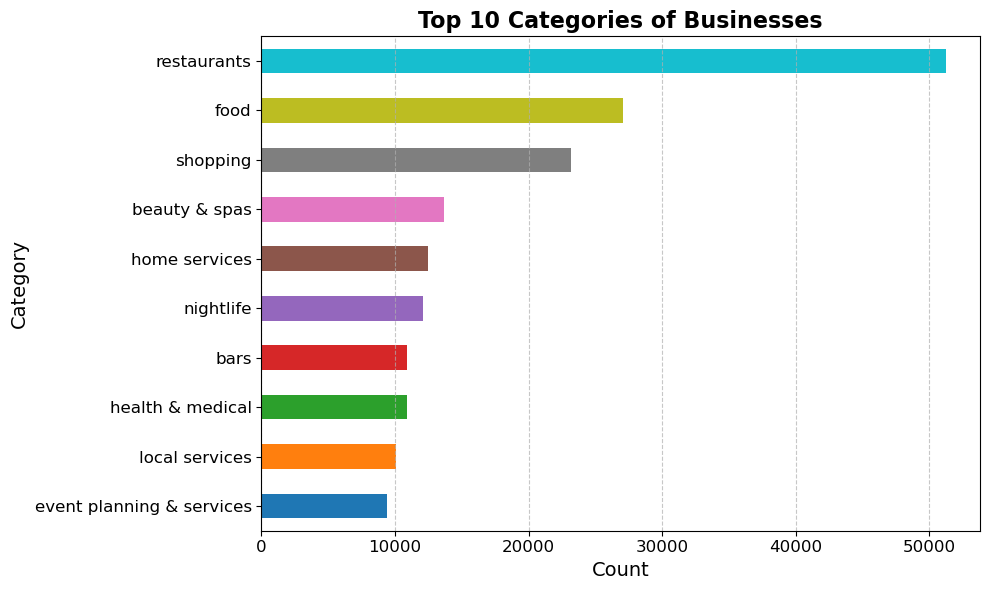

In [126]:
import matplotlib.pyplot as plt

# Calculate category counts
category_counts = df_business['categories'].str.split(', ').explode().value_counts().head(10)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10(range(len(category_counts)))  # Choose colors from a predefined colormap

# Plot the bar chart with customizations
category_counts.sort_values().plot(kind='barh', color=colors)
plt.title('Top 10 Categories of Businesses', fontsize=16, fontweight='bold')  # Set title with custom font size and weight
plt.xlabel('Count', fontsize=14)  # Set x-axis label with custom font size
plt.ylabel('Category', fontsize=14)  # Set y-axis label with custom font size
plt.xticks(fontsize=12)  # Set font size for x-axis tick labels
plt.yticks(fontsize=12)  # Set font size for y-axis tick labels
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines with custom style and transparency
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


This bar chart displays the most prominent business categories on Yelp, offering a snapshot of popular industry segments. It provides a succinct overview of the top business categories based on their prevalence on the platform.

In [127]:
filtered_counts = category_counts[category_counts > 5]

# Count the number of categories remaining after filtering
num_categories = filtered_counts.count()

# Display the filtered counts
print(filtered_counts)

categories
restaurants                  51228
food                         27094
shopping                     23200
beauty & spas                13643
home services                12475
nightlife                    12105
bars                         10919
health & medical             10891
local services               10095
event planning & services     9377
Name: count, dtype: int64


The bar chart illustrates the distribution of businesses by category, revealing that restaurants constitute the largest proportion of opened businesses, followed by food-related establishments, shopping outlets, home services, and so forth.

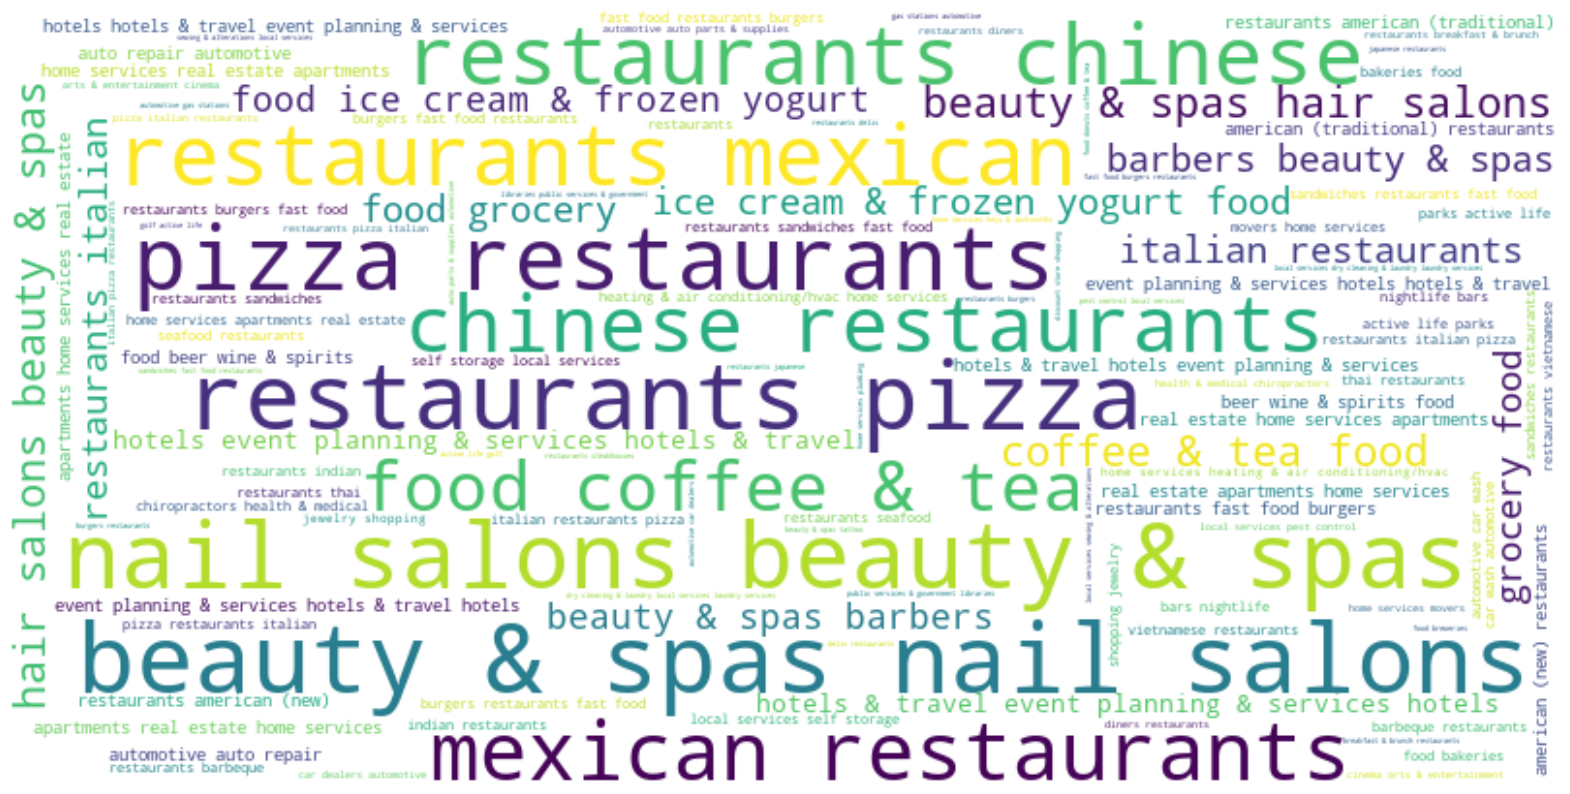

In [128]:
from wordcloud import WordCloud

# Remove commas from the categories data
categories_data = df_business['categories'].str.replace(',', '')

# Count the occurrences of each category
category_counts = categories_data.value_counts()

# Convert the category counts to a dictionary
category_dict = category_counts.to_dict()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(category_dict)

# Display the word cloud
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


The word cloud highlights prominent trends in the market, indicating that pizza and Chinese restaurants are particularly prevalent, with multiple occurrences. Similarly, beauty and spas emerge as dominant categories within the industry.

In [129]:
df_business['state'].value_counts()

state
PA     30790
FL     23519
TN     10891
IN     10212
MO      9955
LA      9045
AZ      8839
NJ      7693
NV      6804
AB      4927
CA      4627
ID      4028
DE      2055
IL      1948
CO         3
WA         2
HI         2
TX         2
NC         1
UT         1
MT         1
MI         1
SD         1
XMS        1
MA         1
VI         1
VT         1
Name: count, dtype: int64

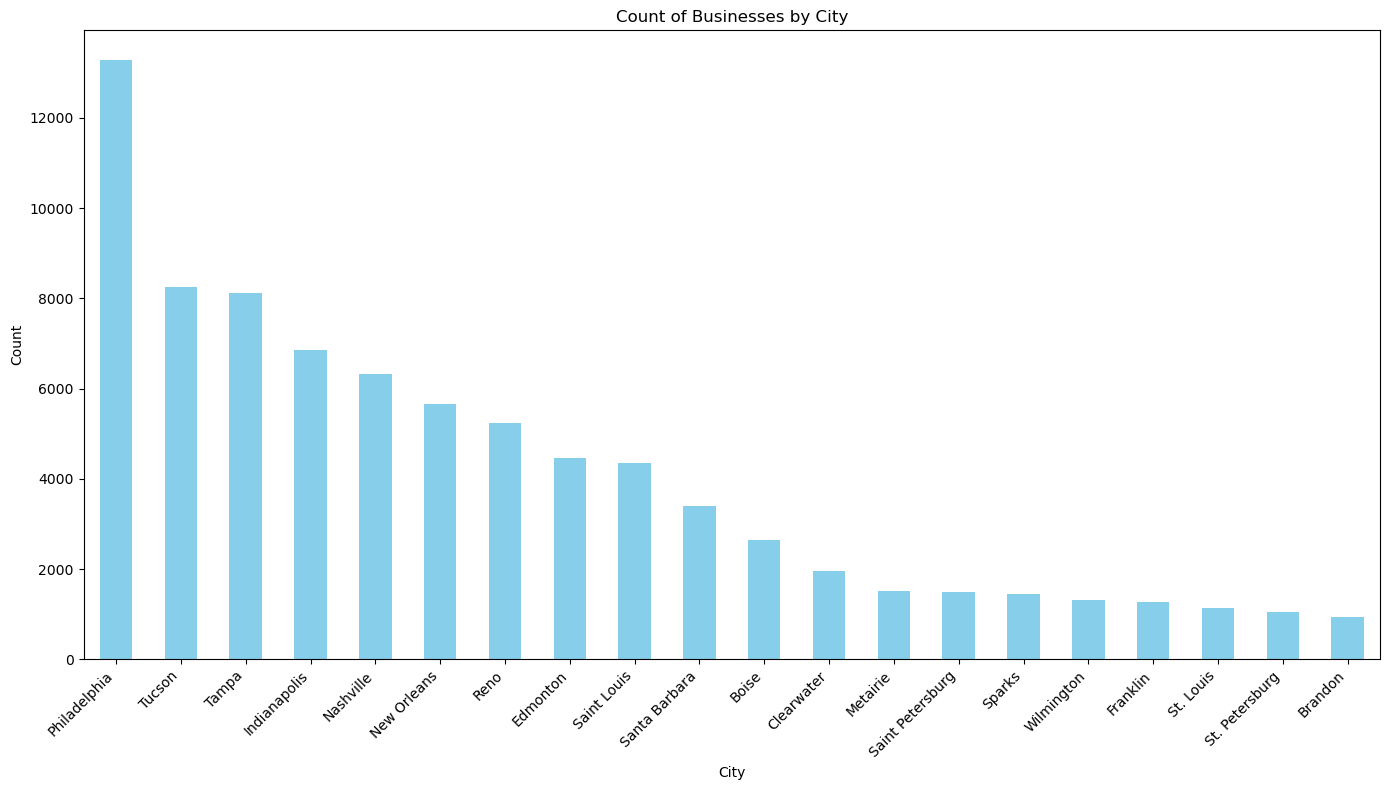

In [130]:

city_counts = df_business['city'].value_counts().head(20)  # Example: showing top 20 cities

# Creating a bar plot
plt.figure(figsize=(14, 8))
city_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Businesses by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The bar chart depicts the distribution of businesses across different locations, with Philadelphia hosting the highest number of establishments, followed by Tucson and Tampa. Conversely, Meridian, St. Petersburg, and St. Louis exhibit the lowest counts of businesses.

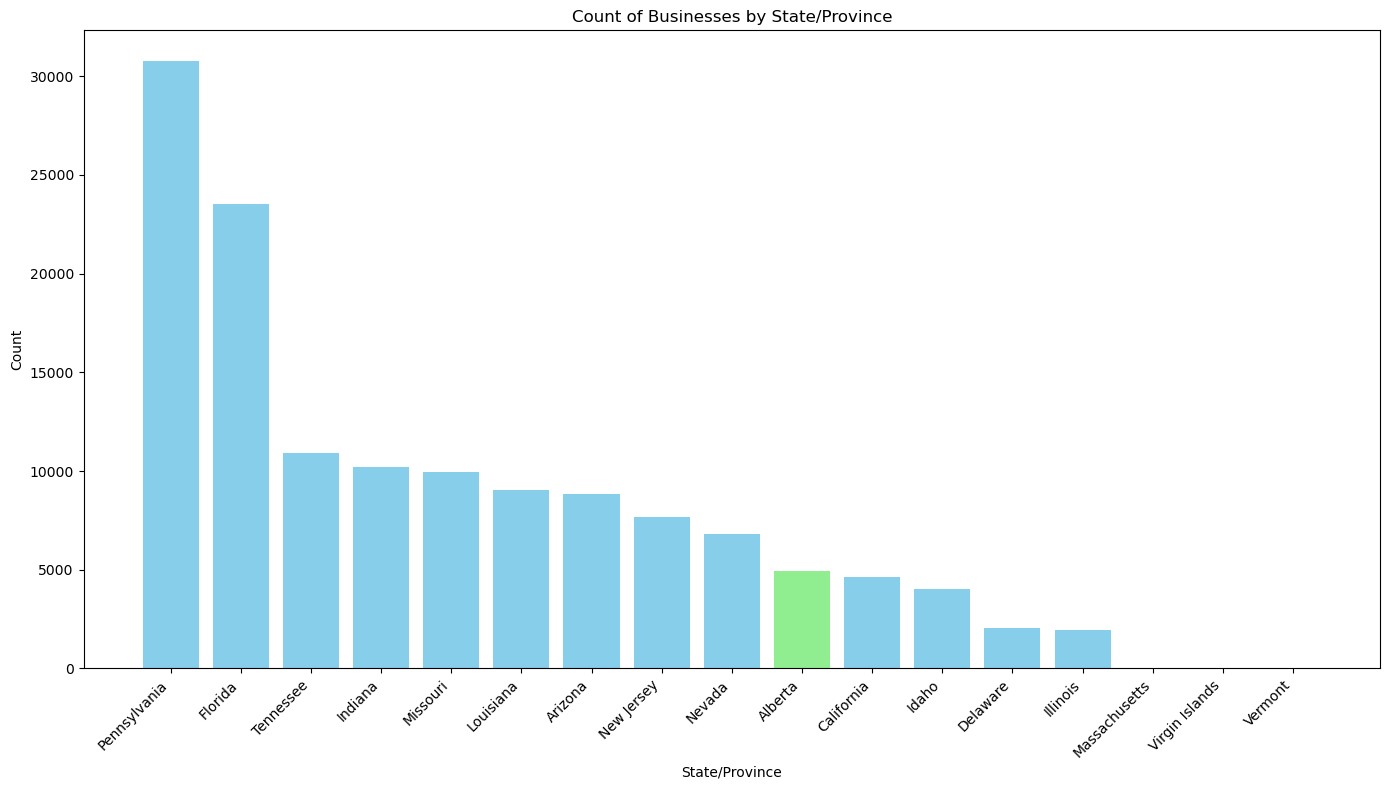

In [131]:

state_counts = df_business['state'].value_counts()

# Define full names for US states and Canadian provinces/territories
state_names = {
    'PA': 'Pennsylvania', 'FL': 'Florida', 'TN': 'Tennessee', 'IN': 'Indiana', 'MO': 'Missouri', 
    'AZ': 'Arizona', 'LA': 'Louisiana', 'NJ': 'New Jersey', 'NV': 'Nevada', 'CA': 'California', 
    'ID': 'Idaho', 'DE': 'Delaware', 'IL': 'Illinois', 'MA': 'Massachusetts', 'VI': 'Virgin Islands', 
    'VT': 'Vermont', 'AB': 'Alberta'  # Add more as needed
}

# Define colors for US states and Canadian provinces/territories
us_states = ['PA', 'FL', 'TN', 'IN', 'MO', 'AZ', 'LA', 'NJ', 'NV', 'CA', 'ID', 'DE', 'IL', 'MA', 'VI', 'VT']
us_state_color = 'skyblue'
canadian_provinces = ['AB']  # Add more Canadian provinces if needed
canadian_province_color = 'lightgreen'

# Create a bar plot
plt.figure(figsize=(14, 8))
for state, count in state_counts.items():
    if state in us_states:
        full_name = state_names[state]
        plt.bar(full_name, count, color=us_state_color)
    elif state in canadian_provinces:
        full_name = state_names[state]
        plt.bar(full_name, count, color=canadian_province_color)

plt.title('Count of Businesses by State/Province')
plt.xlabel('State/Province')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Upon examining the statewise distribution, it becomes evident that Pennsylvania, Florida, and Tennessee are the dominant regions, with notable business presence. Notably, Alberta represents the sole Canadian province included. Conversely, Delaware, Illinois, and Idaho exhibit comparatively fewer businesses

In [132]:
df_business.iloc[0]

business_id      Pns2l4eNsfO8kk83dixA6A
name           Abby Rappoport, LAC, CMQ
city                      Santa Barbara
state                                CA
postal_code                       93101
                         ...           
wraps                                 0
yelp events                           0
yoga                                  0
ziplining                             0
zoos                                  0
Name: 0, Length: 1240, dtype: object

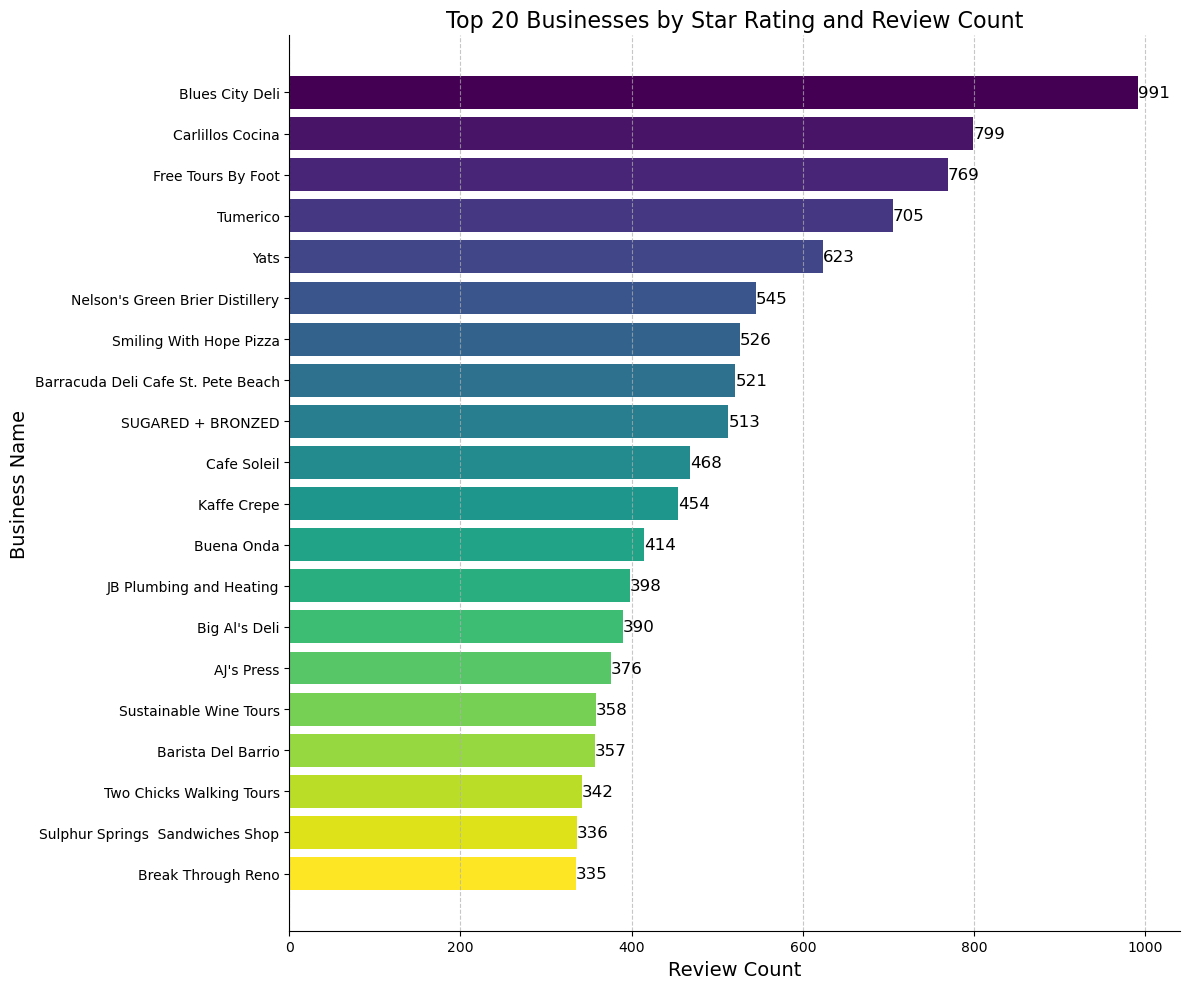

In [133]:

# Sort the dataframe by star rating and review count
sorted_businesses = df_business.sort_values(by=['stars', 'review_count'], ascending=[False, False])

# Select the top 20 businesses
top_20_businesses = sorted_businesses.head(20)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Generate a color map
colors = plt.cm.viridis(np.linspace(0, 1, len(top_20_businesses)))

# Plotting
bars = ax.barh(top_20_businesses['name'], top_20_businesses['review_count'], color=colors)

# Adding labels and title
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Business Name', fontsize=14)
ax.set_title('Top 20 Businesses by Star Rating and Review Count', fontsize=16)

# Adding data labels
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, '{:,}'.format(int(width)), 
            va='center', ha='left', fontsize=12, color='black')

# Adding gridlines
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Removing spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Invert y-axis for better readability
ax.invert_yaxis()

# Tight layout
plt.tight_layout()

# Show plot
plt.show()


The bar chart, considering cumulative reviews and star ratings, reveals Blues City Deli as the top performer with 991 reviews, followed by Free Tours by Foot and Termerico"

In [134]:
# Identify small businesses (single-location) and large businesses (chains)
small_businesses = df_business[df_business['name'].duplicated(keep=False)].drop_duplicates(subset=['name'], keep=False)
large_businesses = df_business[df_business['name'].duplicated(keep=False)].drop_duplicates(subset=['name'], keep='first')

# Count the number of locations for each chain
chain_counts = df_business['name'].value_counts()

# Filter large businesses (chains) with more than three locations
large_businesses = large_businesses[large_businesses['name'].map(chain_counts) > 3]

# Get the counts of small and large businesses
count_small_businesses = len(small_businesses)
count_large_businesses = len(large_businesses)

print("Total businesses:",len(df_business))
print("Number of small businesses (single-location):", count_small_businesses)
print("Number of large businesses (chains with more than 3 locations):", count_large_businesses)


Total businesses: 135351
Number of small businesses (single-location): 0
Number of large businesses (chains with more than 3 locations): 1726


In [135]:
# Count the number of locations for each chain
chain_counts = df_business['name'].value_counts()
chain_counts

name
Starbucks                                702
McDonald's                               699
Dunkin'                                  505
Subway                                   454
Taco Bell                                359
                                        ... 
MadMax Salon                               1
Etherton Gallery                           1
Charlie's Pizza                            1
On the Border Mexican Grill & Cantina      1
The Black Cat                              1
Name: count, Length: 102563, dtype: int64

In [136]:
# Filter small businesses (single-location or with name repeating max twice or thrice)
small_businesses = df_business[df_business['name'].duplicated(keep=False)].drop_duplicates(subset=['name'], keep=False)
small_businesses_count = len(small_businesses)
max_name_repeats = 3

# Identify small businesses with name repeating max twice or thrice
small_businesses_max_repeat = df_business[df_business['name'].duplicated(keep=False)]
small_businesses_max_repeat_count = len(small_businesses_max_repeat['name'].unique())

# Filter large businesses (chains) with more than three locations
large_businesses = df_business[df_business['name'].duplicated(keep=False)].drop_duplicates(subset=['name'], keep='first')
chain_counts = df_business['name'].value_counts()
large_businesses = large_businesses[large_businesses['name'].map(chain_counts) > max_name_repeats]
large_businesses_count = len(large_businesses)

print("Number of small businesses :", small_businesses_count + small_businesses_max_repeat_count)
print("Number of large businesses (chains with more than", max_name_repeats, "locations):", large_businesses_count)


Number of small businesses : 7224
Number of large businesses (chains with more than 3 locations): 1726


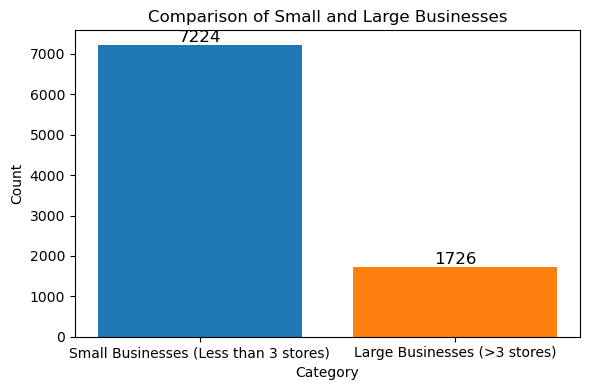

In [137]:

# Define the counts and categories
counts = [small_businesses_count + small_businesses_max_repeat_count, large_businesses_count]
categories = ['Small Businesses (Less than 3 stores)', 'Large Businesses (>3 stores)']

# Define colors
colors = ['#1f77b4', '#ff7f0e']

# Create bar plot
plt.figure(figsize=(6, 4))
bars = plt.bar(categories, counts, color=colors)

# Add data labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom', color='black', fontsize=12)

# Add title and labels
plt.title('Comparison of Small and Large Businesses')
plt.xlabel('Category')
plt.ylabel('Count')

# Show plot
plt.tight_layout()
plt.show()


The bar chart illustrates the distribution of small and large businesses within the database, offering insights into their relative representation. It visually compares the quantities of small and large businesses present in the dataset.

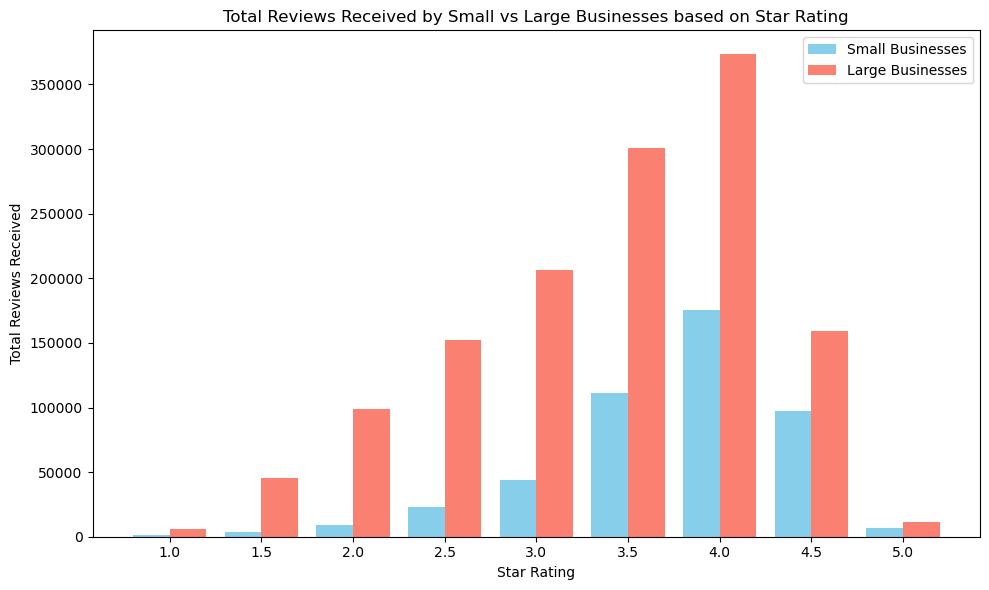

In [138]:

# Calculate total review count for small businesses based on star rating
total_reviews_small_rating = df_business[df_business['name'].duplicated(keep=False) & 
                                         ~df_business['name'].duplicated(keep='first')].groupby('stars')['review_count'].sum()

# Calculate total review count for large businesses based on star rating
total_reviews_large_rating = df_business[df_business['name'].duplicated(keep=False) & 
                                         df_business['name'].duplicated(keep='first')].groupby('stars')['review_count'].sum()

# Create a bar plot for small businesses
plt.figure(figsize=(10, 6))
plt.bar(total_reviews_small_rating.index - 0.1, total_reviews_small_rating.values, width=0.2, label='Small Businesses', color='skyblue')

# Create a bar plot for large businesses
plt.bar(total_reviews_large_rating.index + 0.1, total_reviews_large_rating.values, width=0.2, label='Large Businesses', color='salmon')

# Add labels and title
plt.xlabel('Star Rating')
plt.ylabel('Total Reviews Received')
plt.title('Total Reviews Received by Small vs Large Businesses based on Star Rating')
plt.xticks(total_reviews_small_rating.index)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


The observation suggests that large businesses tend to receive higher ratings, possibly due to higher foot traffic or customer volume. This could be attributed to the larger customer base frequenting these establishments.

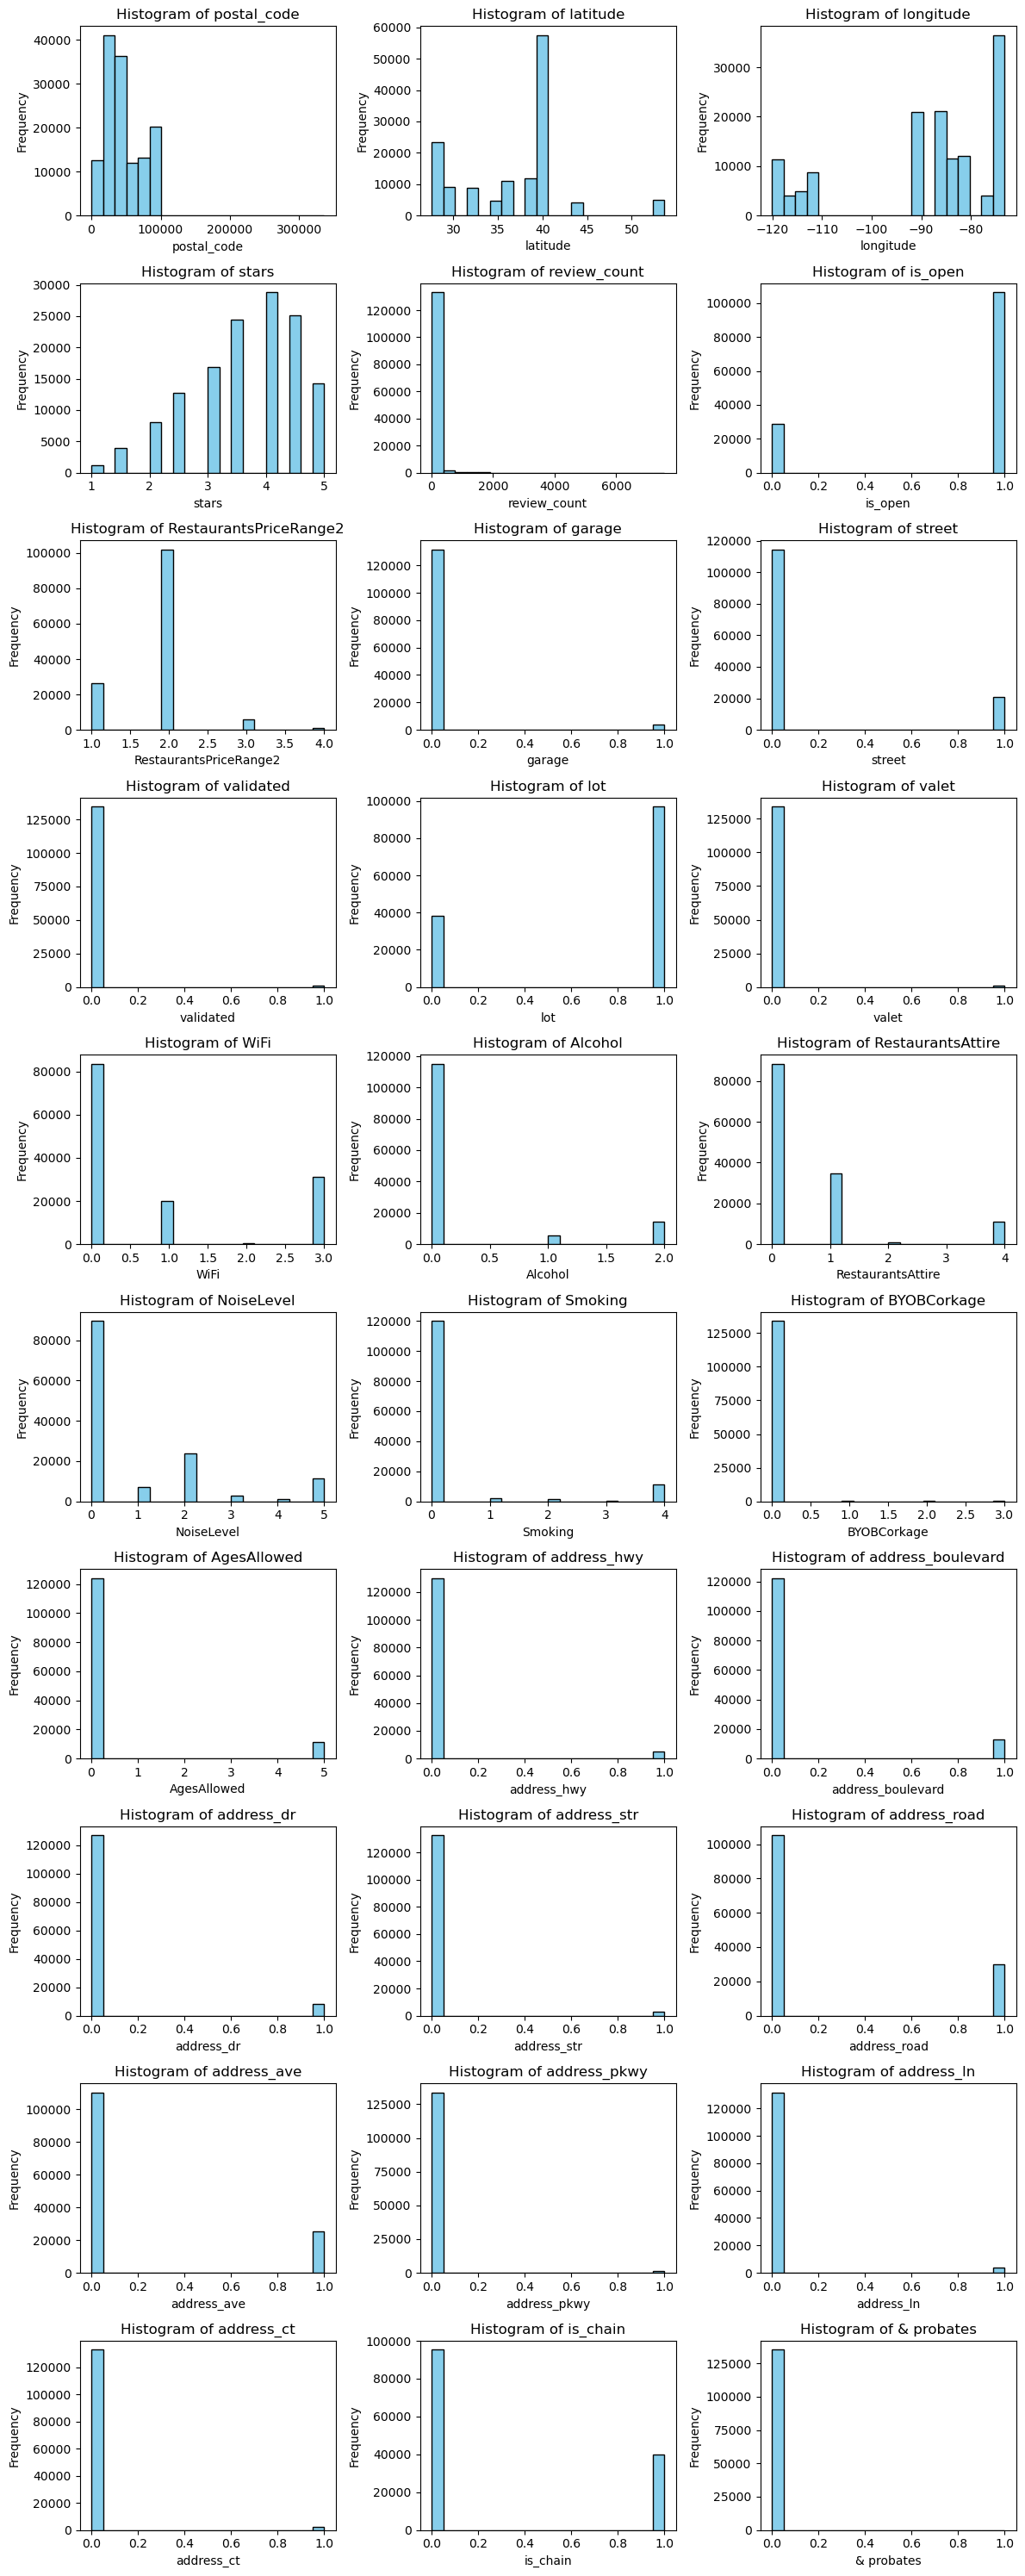

In [139]:

# Select only columns of type 'number'
numeric_columns = df_business.select_dtypes(include=['number','float']).columns

# Select the first 10 numeric columns
numeric_columns_subset = numeric_columns[:30]

# Calculate the number of rows needed based on the desired 3-column layout
num_plots = len(numeric_columns_subset)
num_rows = (num_plots + 2) // 3  # Round up to the nearest integer

# Create subplots with 3 columns
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(12, 3 * num_rows))

# Plot histograms for each numeric column
for i, column in enumerate(numeric_columns_subset):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.hist(df_business[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')


# Adjust layout
plt.tight_layout()
plt.show()


we can see most of the charts are right skewed. Stars show us that most of the businesses are doing great.

In [140]:

# Assuming df_business is your DataFrame
string_columns = df_business.select_dtypes(include=['object']).columns

print("String columns:", string_columns)

String columns: Index(['business_id', 'name', 'city', 'state', 'attributes', 'categories',
       'BusinessAcceptsCreditCards', 'BusinessParking', 'category'],
      dtype='object')


In [141]:
numeric_columns.shape

(1217,)

#### Getting rid of multicollinearity

In [142]:
# Assuming df_business is your DataFrame containing numeric columns
numeric_columns = df_business.select_dtypes(include=['number', 'float'])

# Lets get the correlation matrix and save to variable 'corr_mat'
corr_mat = numeric_columns.corr()

# Display corr_mat
corr_mat

,postal_code,latitude,longitude,stars,review_count,is_open,RestaurantsPriceRange2,garage,street,validated,...,wine tasting room,wine tours,wineries,women's clothing,workers compensation law,wraps,yelp events,yoga,ziplining,zoos
postal_code,1.000000,-0.295897,-0.747805,0.071372,0.050309,0.011298,-0.000182,-0.002475,0.002163,0.000254,...,0.020588,0.027535,0.021580,0.001299,0.000758,-0.015182,0.004022,-0.001610,-0.002628,0.003542
latitude,-0.295897,1.000000,-0.132126,-0.037349,-0.049008,-0.016349,-0.002851,-0.001335,-0.002348,-0.001211,...,-0.005367,-0.004705,-0.005147,0.011555,-0.002704,-0.005224,-0.007201,0.003469,-0.000055,-0.005482
longitude,-0.747805,-0.132126,1.000000,-0.059720,-0.011136,-0.014574,0.001177,0.002066,0.000405,-0.000260,...,-0.021460,-0.029737,-0.021361,-0.011778,-0.000707,0.020108,-0.002837,-0.001376,0.003691,-0.002365
stars,0.071372,-0.037349,-0.059720,1.000000,0.058042,0.054441,0.001085,-0.003229,-0.000766,-0.001359,...,0.025618,0.024249,0.031287,-0.006859,0.003426,0.009239,0.007172,0.055543,0.005831,0.007255
review_count,0.050309,-0.049008,-0.011136,0.058042,1.000000,0.037217,-0.005315,-0.003029,-0.000993,-0.001574,...,0.009708,0.002071,0.017224,-0.029746,-0.001527,0.004930,-0.000970,-0.017473,0.000875,0.015002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wraps,-0.015182,-0.005224,0.020108,0.009239,0.004930,-0.002995,0.003900,-0.001372,0.000465,-0.001506,...,-0.001564,-0.001224,-0.002367,-0.005933,-0.000408,1.000000,-0.000695,-0.003886,-0.000447,-0.000912
yelp events,0.004022,-0.007201,-0.002837,0.007172,-0.000970,-0.003429,-0.005153,-0.002475,-0.004857,-0.001106,...,-0.000483,-0.000378,-0.000730,-0.001831,-0.000126,-0.000695,1.000000,-0.001199,-0.000138,-0.000281
yoga,-0.001610,0.003469,-0.001376,0.055543,-0.017473,-0.005480,-0.000119,-0.001689,-0.004079,0.001066,...,0.000056,-0.002113,-0.002261,0.005245,-0.000704,-0.003886,-0.001199,1.000000,-0.000771,0.003151
ziplining,-0.002628,-0.000055,0.003691,0.005831,0.000875,0.004917,0.002500,-0.001592,-0.001851,-0.000711,...,-0.000310,-0.000243,-0.000470,-0.001178,-0.000081,-0.000447,-0.000138,-0.000771,1.000000,-0.000181


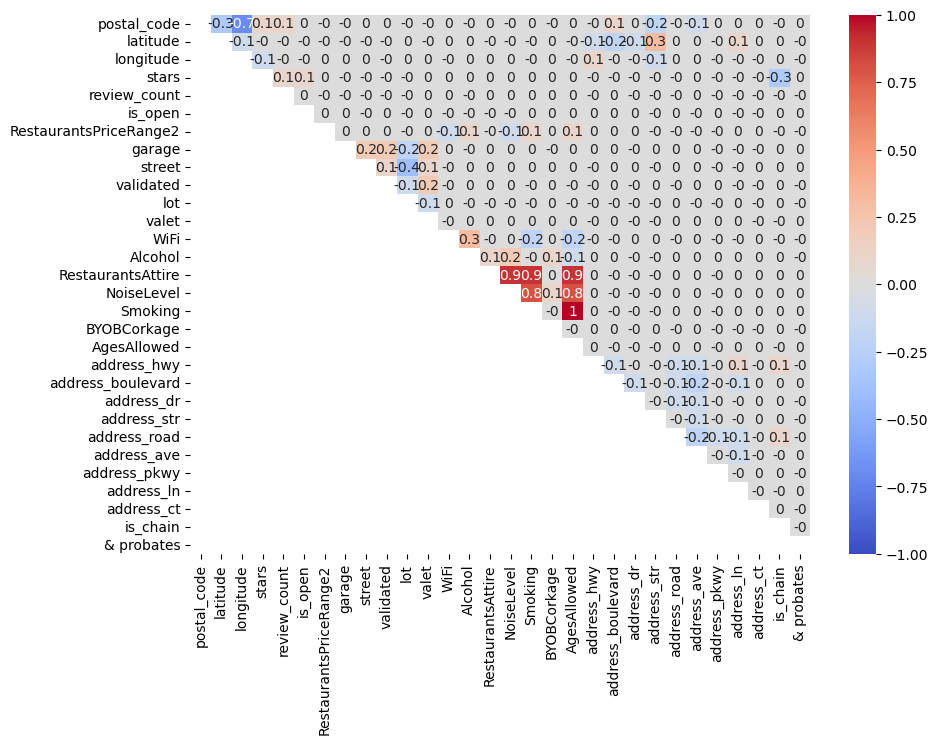

In [143]:
plt.figure(figsize=(10, 7))

# Selecting first 20 features
corr_mat_subset = corr_mat.iloc[:30, :30].round(1)

# Creating mask of duplicated combinations
mask = np.tril(np.ones_like(corr_mat_subset, dtype=bool))

# Plotting heatmap
sns.heatmap(corr_mat_subset, mask=mask, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True)

plt.show()

We can see that Noise Level is higly correlated with Restaurant's attire, thus we have to get rid of one of these.(multicollinearity)

In [144]:
numeric_columns[['NoiseLevel', 'RestaurantsAttire']].var()

NoiseLevel           2.308139
RestaurantsAttire    1.248441
dtype: float64

In [145]:
numeric_columns.drop(columns='RestaurantsAttire',inplace=True)

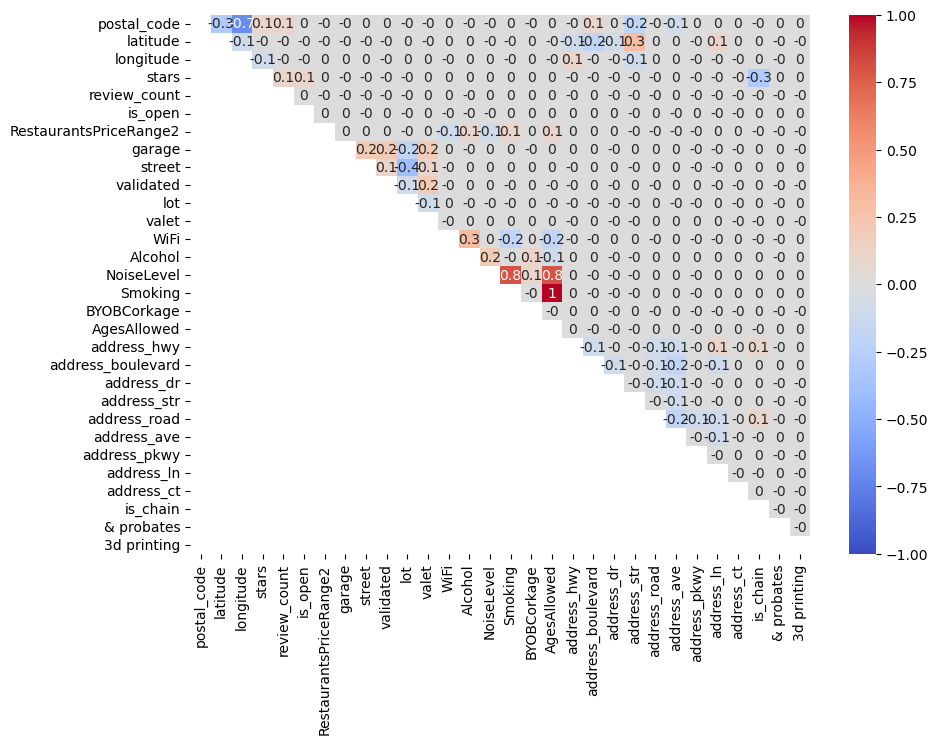

In [146]:

# Lets get the correlation matrix and save to variable 'corr_mat'
corr_mat = numeric_columns.corr()

plt.figure(figsize=(10, 7))

# Selecting first 20 features
corr_mat_subset = corr_mat.iloc[:30, :30].round(1)

# Creating mask of duplicated combinations
mask = np.tril(np.ones_like(corr_mat_subset, dtype=bool))

# Plotting heatmap
sns.heatmap(corr_mat_subset, mask=mask, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True)

plt.show()

In [147]:
numeric_columns[['Smoking', 'AgesAllowed']].var()

Smoking        1.267865
AgesAllowed    1.905222
dtype: float64

In [148]:
numeric_columns.drop(columns='Smoking',inplace=True)

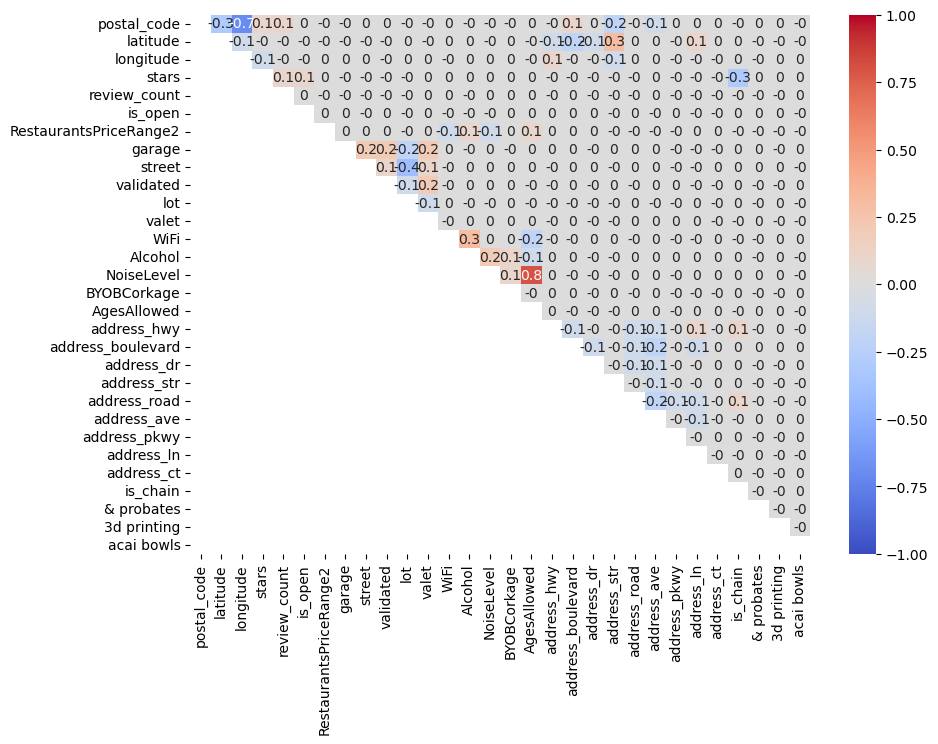

In [149]:

# Lets get the correlation matrix and save to variable 'corr_mat'
corr_mat = numeric_columns.corr()

plt.figure(figsize=(10, 7))

# Selecting first 20 features
corr_mat_subset = corr_mat.iloc[:30,0:30].round(1)

# Creating mask of duplicated combinations
mask = np.tril(np.ones_like(corr_mat_subset, dtype=bool))

# Plotting heatmap
sns.heatmap(corr_mat_subset, mask=mask, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True)

plt.show()

In [150]:
numeric_columns[['NoiseLevel', 'AgesAllowed']].var()

NoiseLevel     2.308139
AgesAllowed    1.905222
dtype: float64

In [151]:
numeric_columns.drop(columns='AgesAllowed',inplace=True)

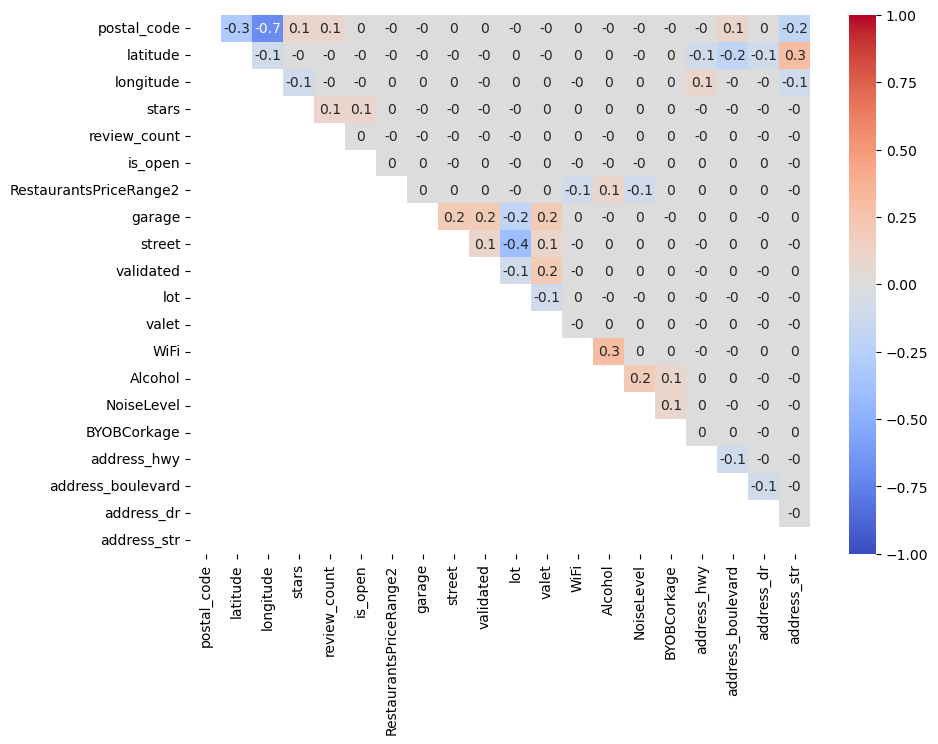

In [152]:

# Lets get the correlation matrix and save to variable 'corr_mat'
corr_mat = numeric_columns.corr()

plt.figure(figsize=(10, 7))

# Selecting first 20 features
corr_mat_subset = corr_mat.iloc[:20,0:20].round(1)

# Creating mask of duplicated combinations
mask = np.tril(np.ones_like(corr_mat_subset, dtype=bool))

# Plotting heatmap
sns.heatmap(corr_mat_subset, mask=mask, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True)

plt.show()

In [153]:
#Got rid of postal code instead of lontitude so that i could display map on streamlit
numeric_columns.drop(columns='postal_code',inplace=True)

In [154]:
# Perform one-hot encoding on the 'city' column
city_encoded = pd.get_dummies(df_business['city'], prefix='city')

# Concatenate the one-hot encoded DataFrame with the original DataFrame
numeric_columns = pd.concat([numeric_columns, city_encoded], axis=1)


In [156]:
# Reset the index of the DataFrame
#numeric_columns.reset_index(drop=True, inplace=True)

#numeric_columns.drop(columns='Unnamed: 0',inplace=True)

In [157]:
numeric_columns.shape

(135351, 2554)

In [160]:
#save the work
numeric_columns.to_csv(path_or_buf='data/numeric_columns1.csv')

Continued in Capstone Part 2...


Link to GitHub: https://github.com/Guntaask/Capstone-Project